In [1]:
import os
os.chdir('/grid_mnt/data_cms_upgrade/biriukov/TICL_Validation/python')
from validation.DataFile import *
from validation.DataProcessor import *
from validation.NTupler import *
from validation.Plotter import *
filepath = '/grid_mnt/data_cms_upgrade/biriukov/data/singleElectrons_D110/step3_no_PU/14_2_0_pre1/dumper/dumper_merged.root'

tfile = DataFile(filepath)
tscores = Association()
tcomb = Combination()

tscores.getData(tfile)
tcomb.getData(tfile)

0

In [2]:
cp_e_bins = np.array([0., 50., 100., 150., 200., 280., 360., 440., 600., 760., 1200.])
reco_e_bins = np.array([0., 50., 100., 150., 200., 280., 360., 440., 600., 760., 1200.])
score_edges = [0., 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.6, 1.]
n_a_bins = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65,\
            0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.]
n_e_bins = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65,\
            0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.]

reco_energy = ak.flatten(tfile.openArray('ticlDumper/trackstersCLUE3DHigh', 'raw_energy'))
recoToSim_score = tscores.data['association_LC_CP_score']
simToReco_score = np.array(ak.flatten((tfile.openArray('ticlDumper/associations', 'tsCLUE3D_simToReco_CP_score')[:,0])[tscores.data['association_LC_CP']]))
cp_energy = ak.flatten(tfile.openArray('ticlDumper/simtrackstersCP', 'raw_energy')[tscores.data['association_LC_CP']])
energy_ratio = np.array(reco_energy/cp_energy)

In [3]:
data_2D, e_bins, a_bins = np.histogram2d(energy_ratio, recoToSim_score, (n_e_bins, n_a_bins))
data_2D += 1

In [4]:
cp_e_maps = []
for i in range(len(cp_e_bins) - 1):
    cp_e_maps.append((cp_energy > cp_e_bins[i]) & (cp_energy < cp_e_bins[i+1]))

reco_e_maps = []
for i in range(len(reco_e_bins) - 1):
    reco_e_maps.append((reco_energy > reco_e_bins[i]) & (reco_energy < reco_e_bins[i+1]))

In [5]:
cp_histo_list = []
for map in cp_e_maps:
    data, e_bins, a_bins = np.histogram2d(energy_ratio[map], recoToSim_score[map], (n_e_bins, n_a_bins))
    cp_histo_list.append([data + 1, e_bins, a_bins])

reco_histo_list = []
for map in reco_e_maps:
    data, e_bins, a_bins = np.histogram2d(energy_ratio[map], recoToSim_score[map], (n_e_bins, n_a_bins))
    reco_histo_list.append([data + 1, e_bins, a_bins])

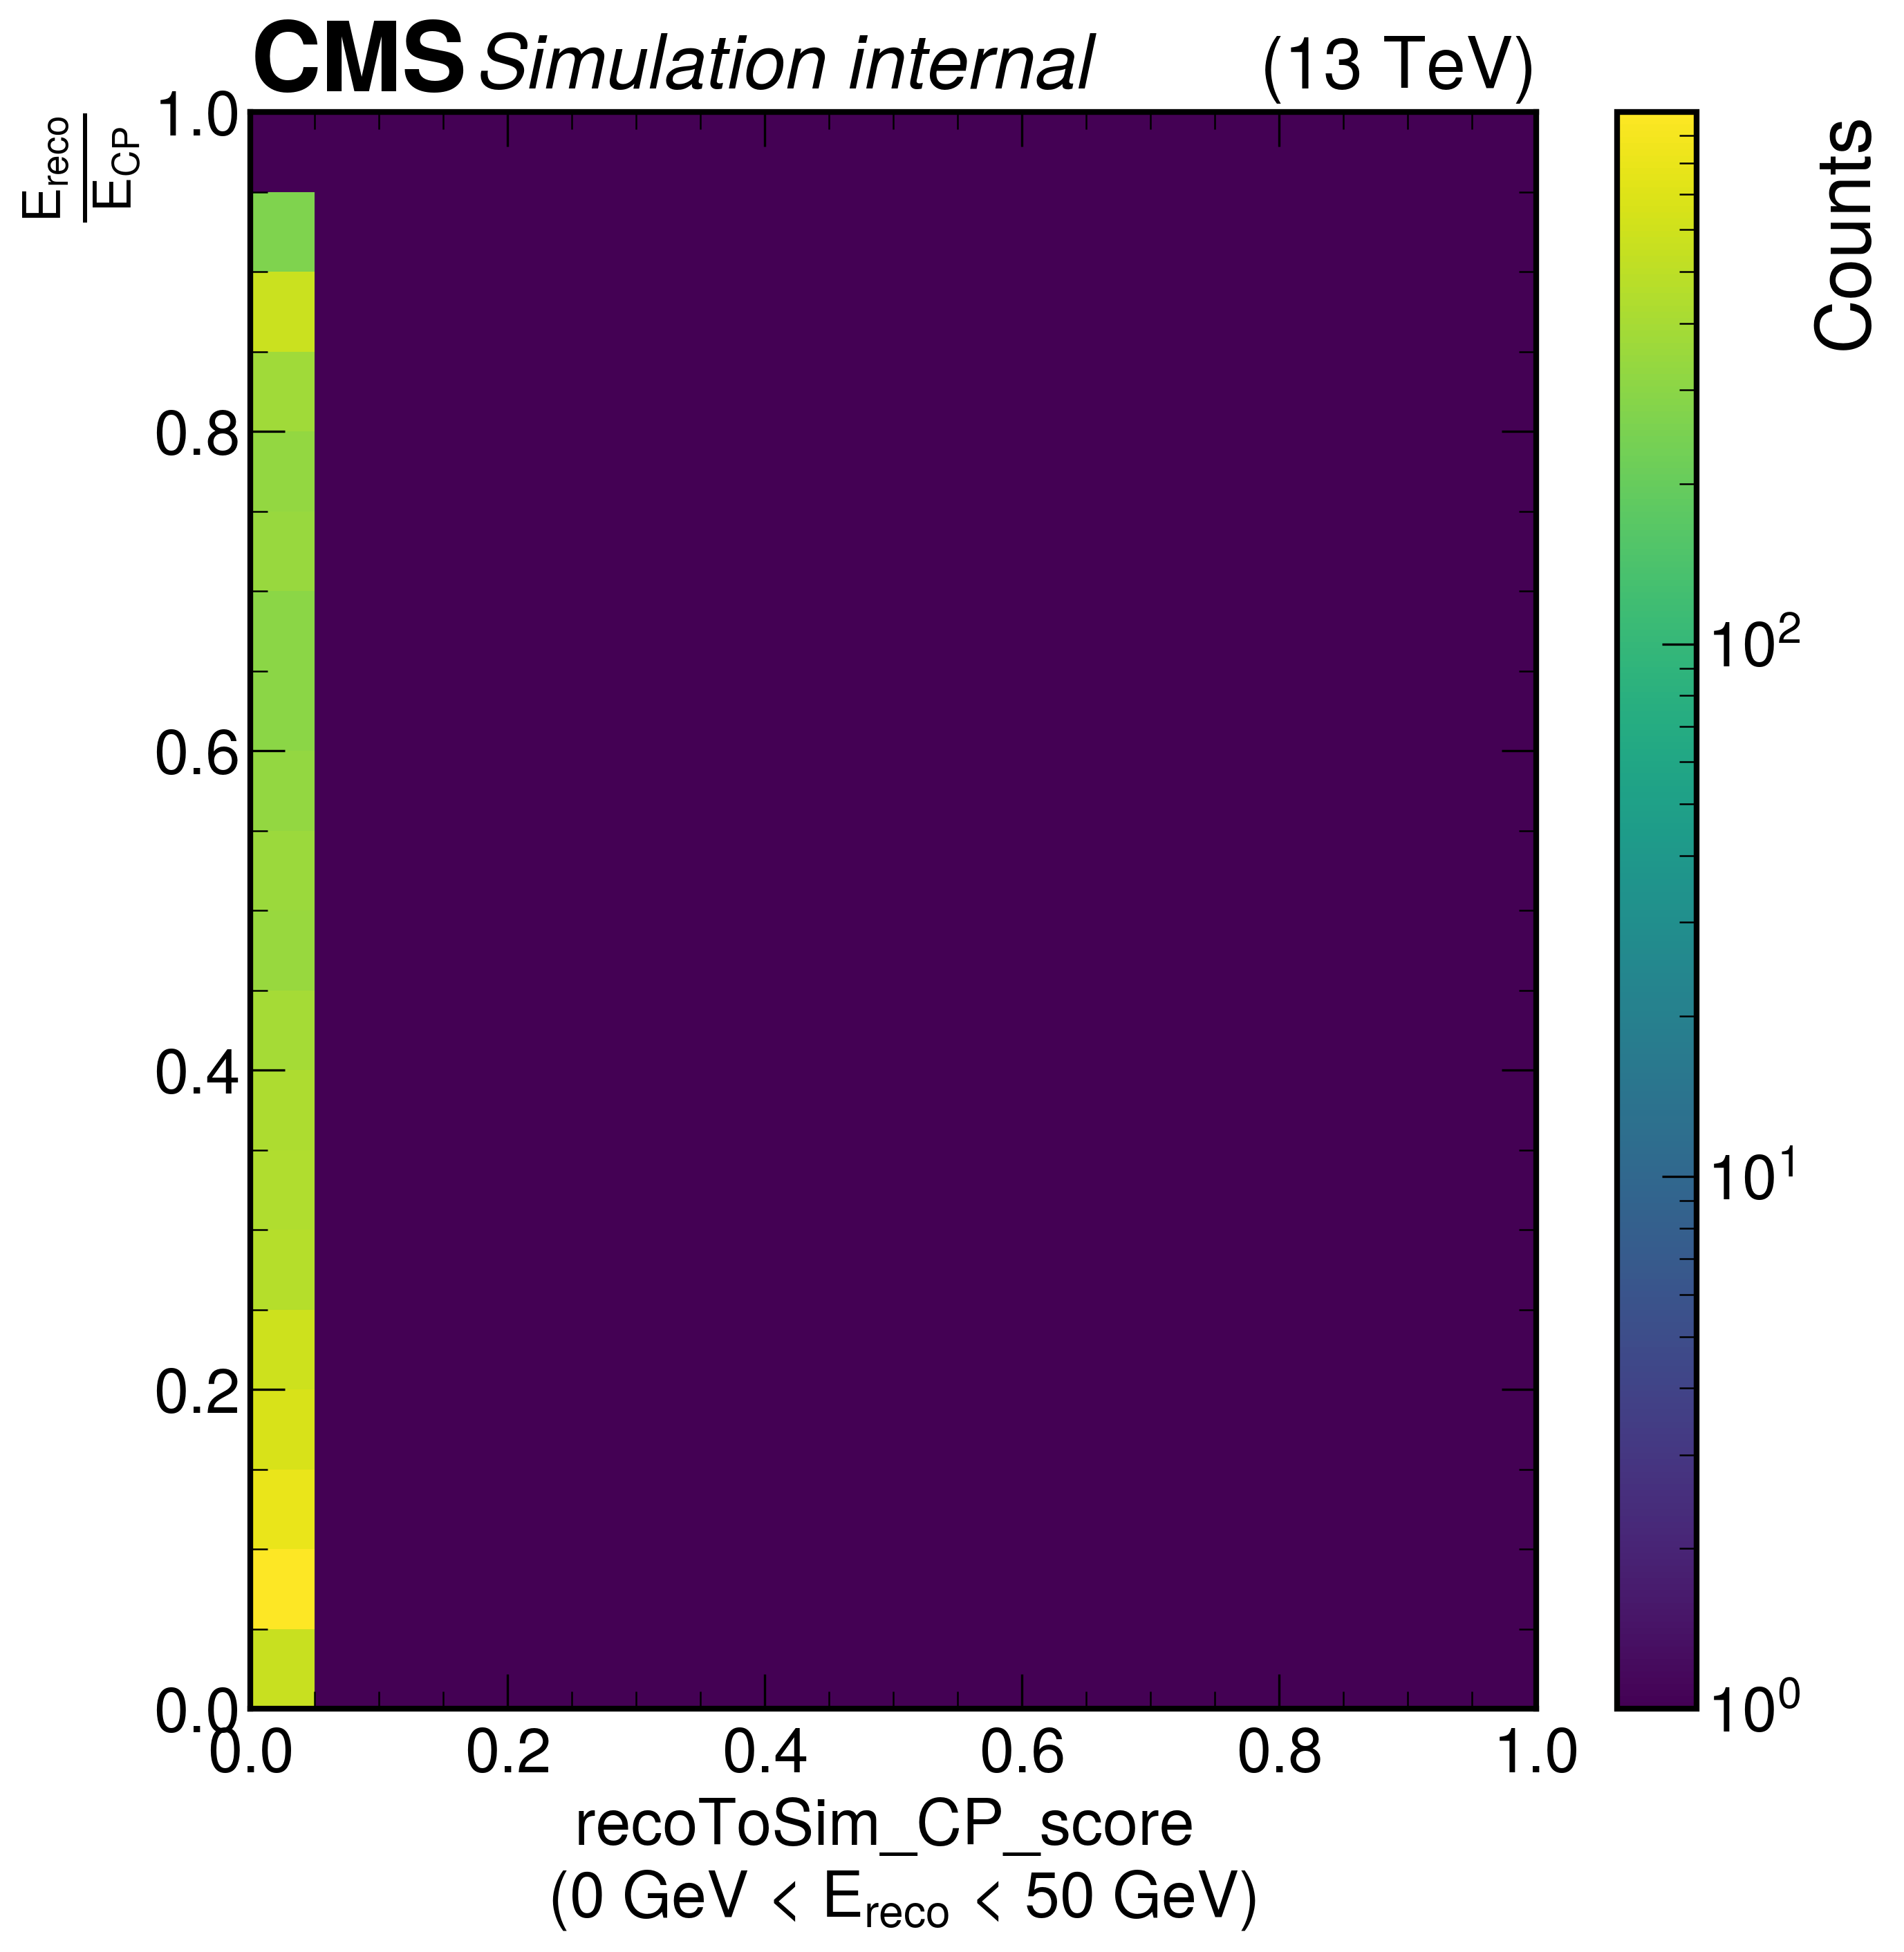

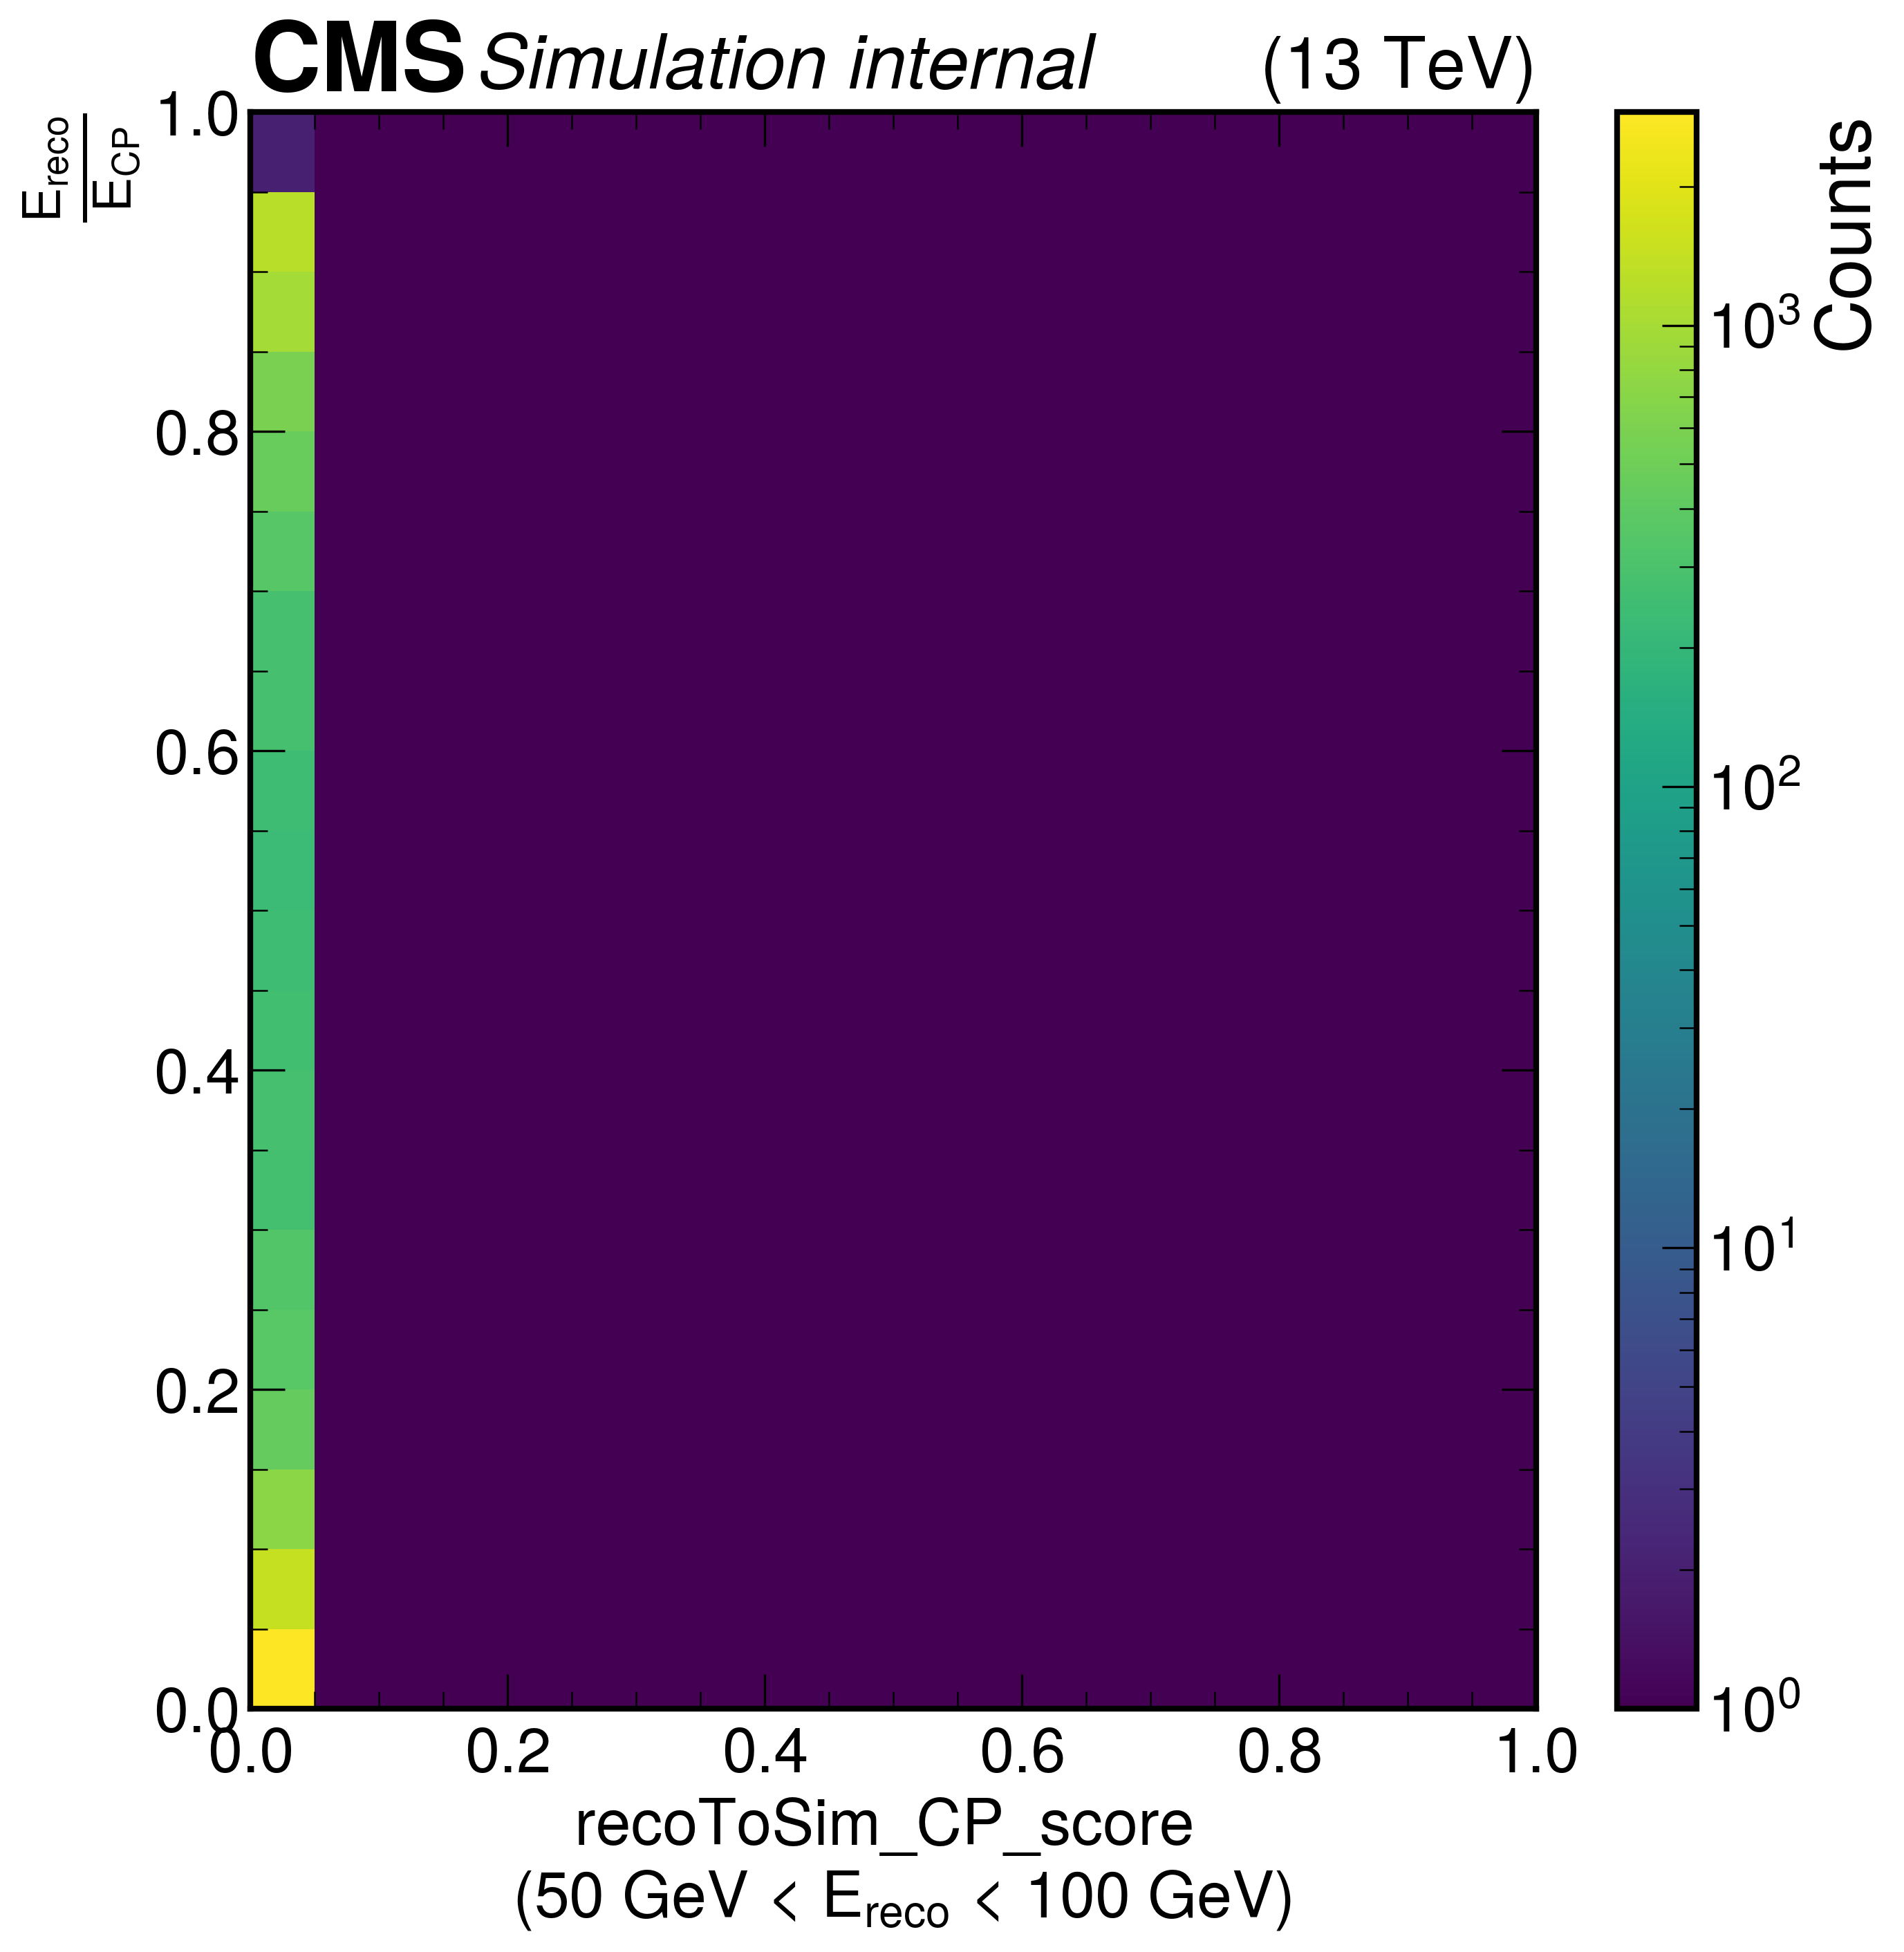

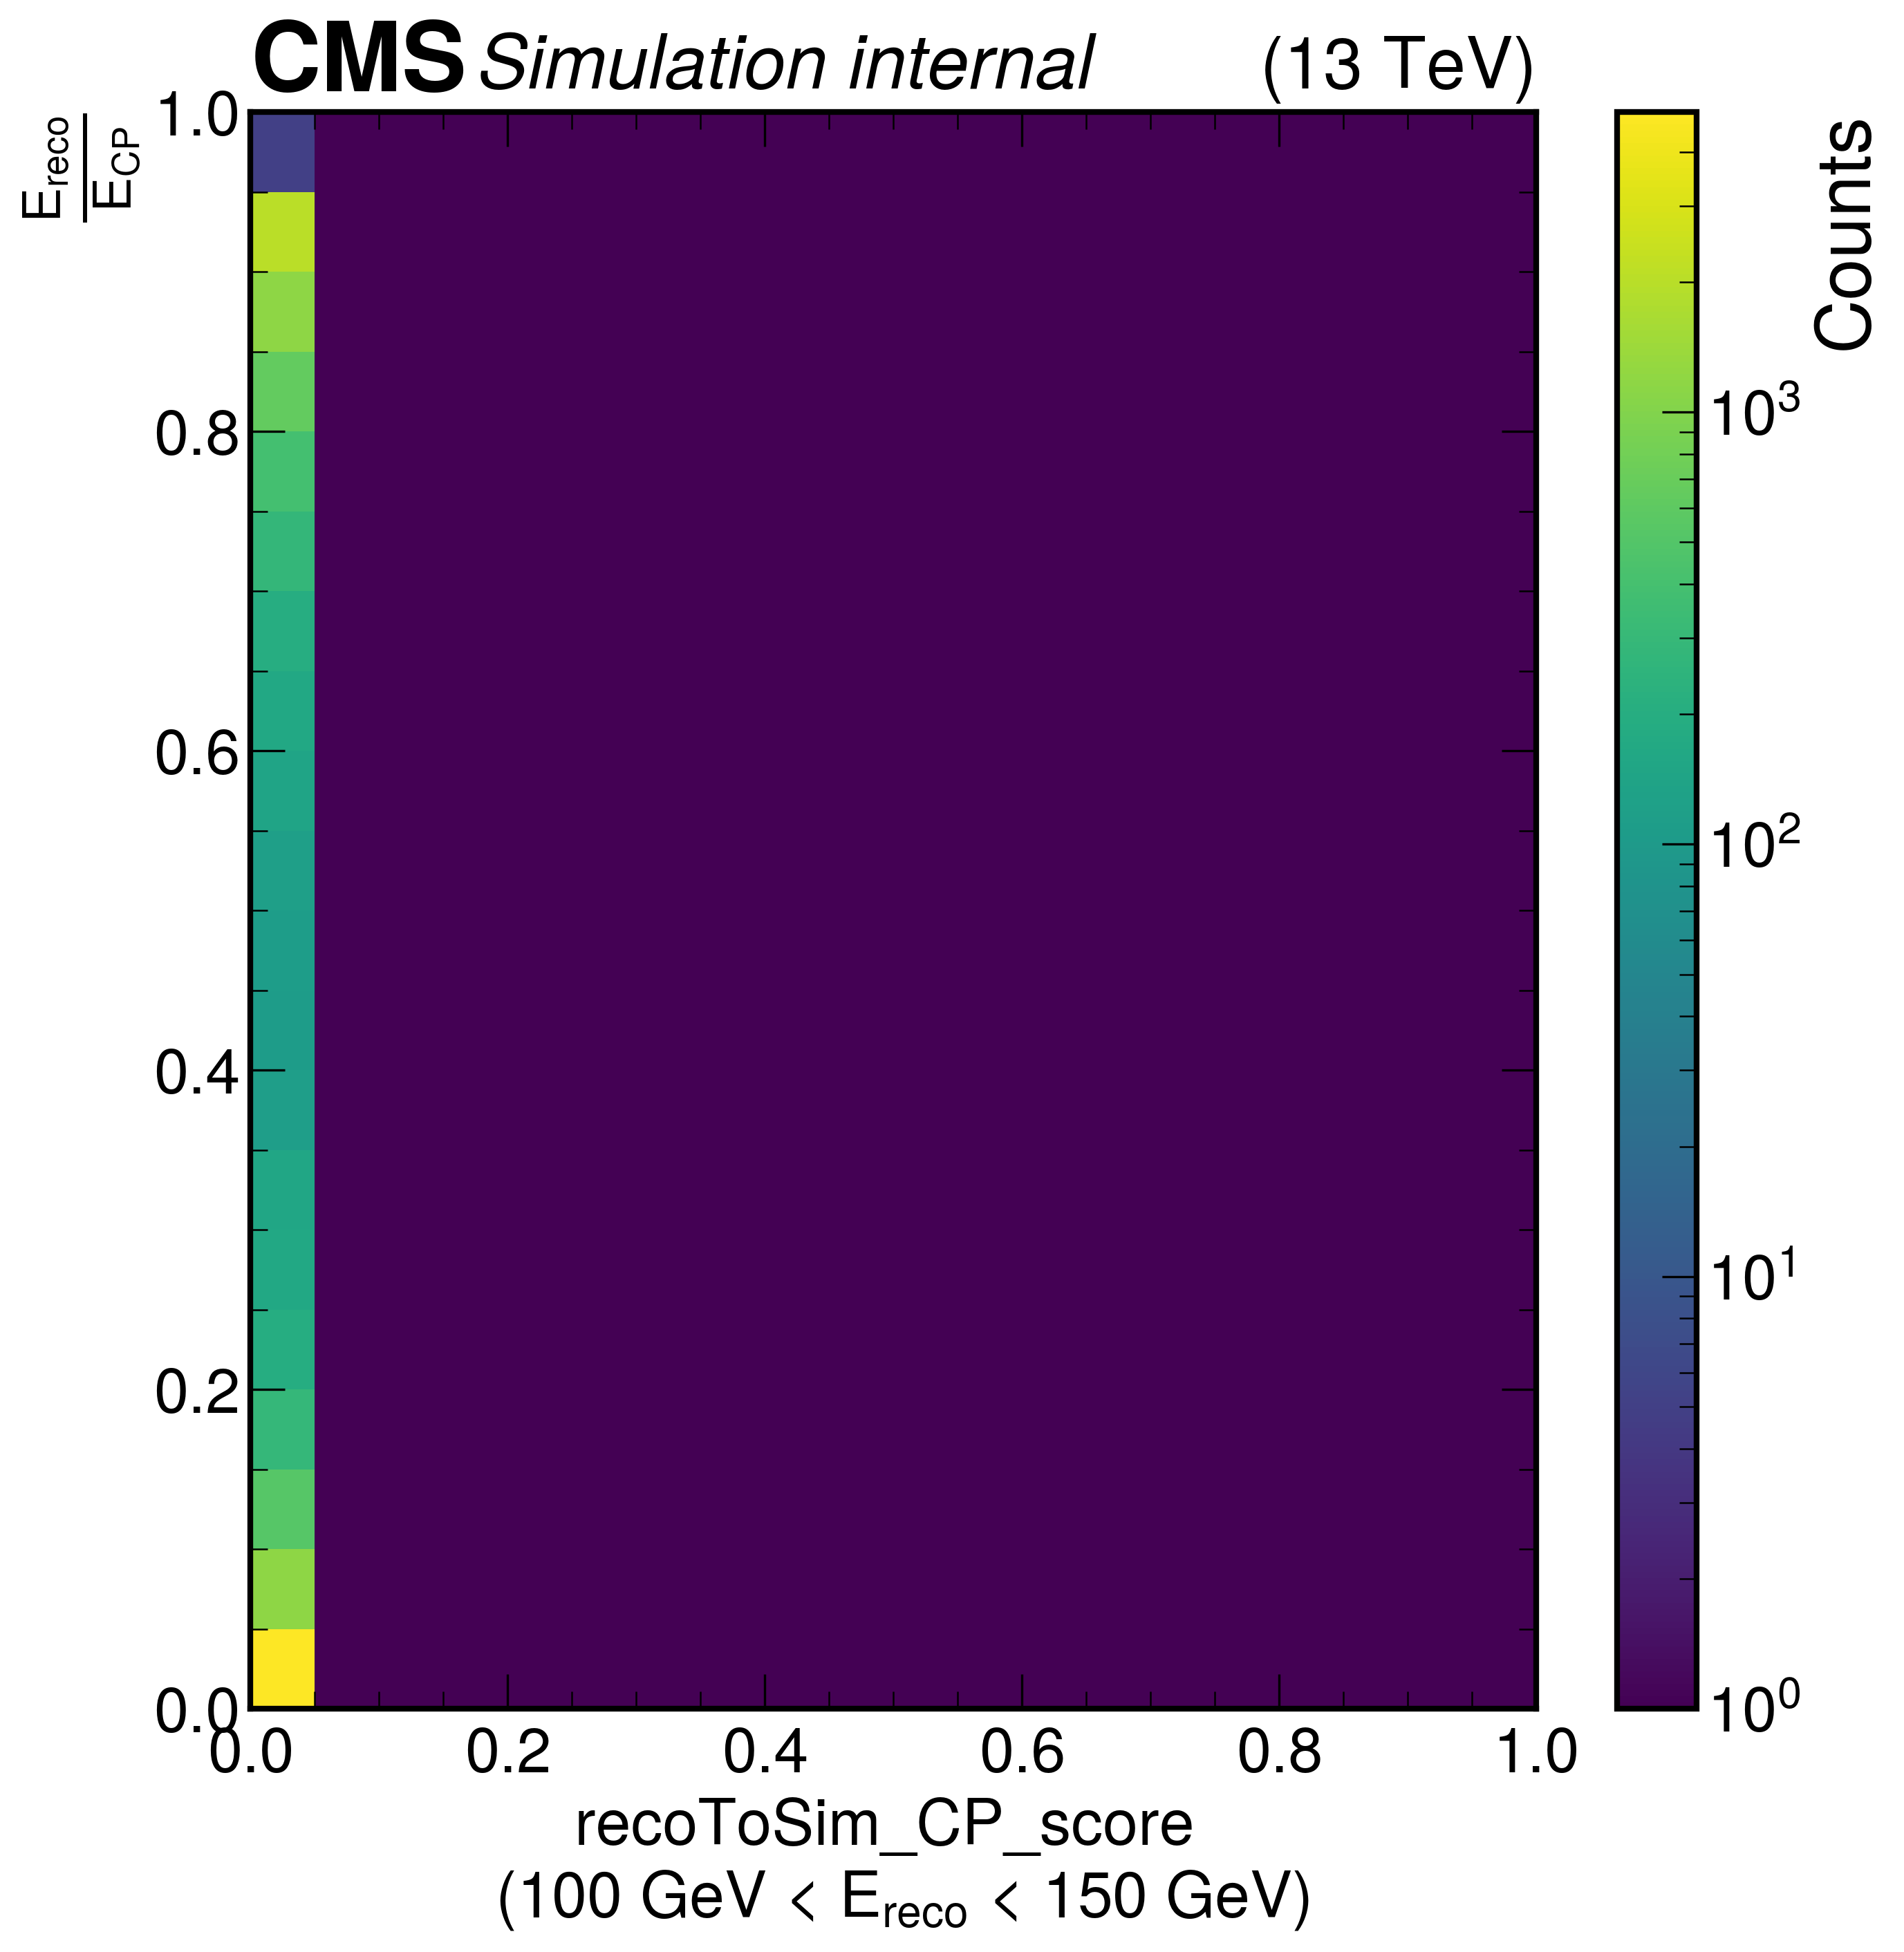

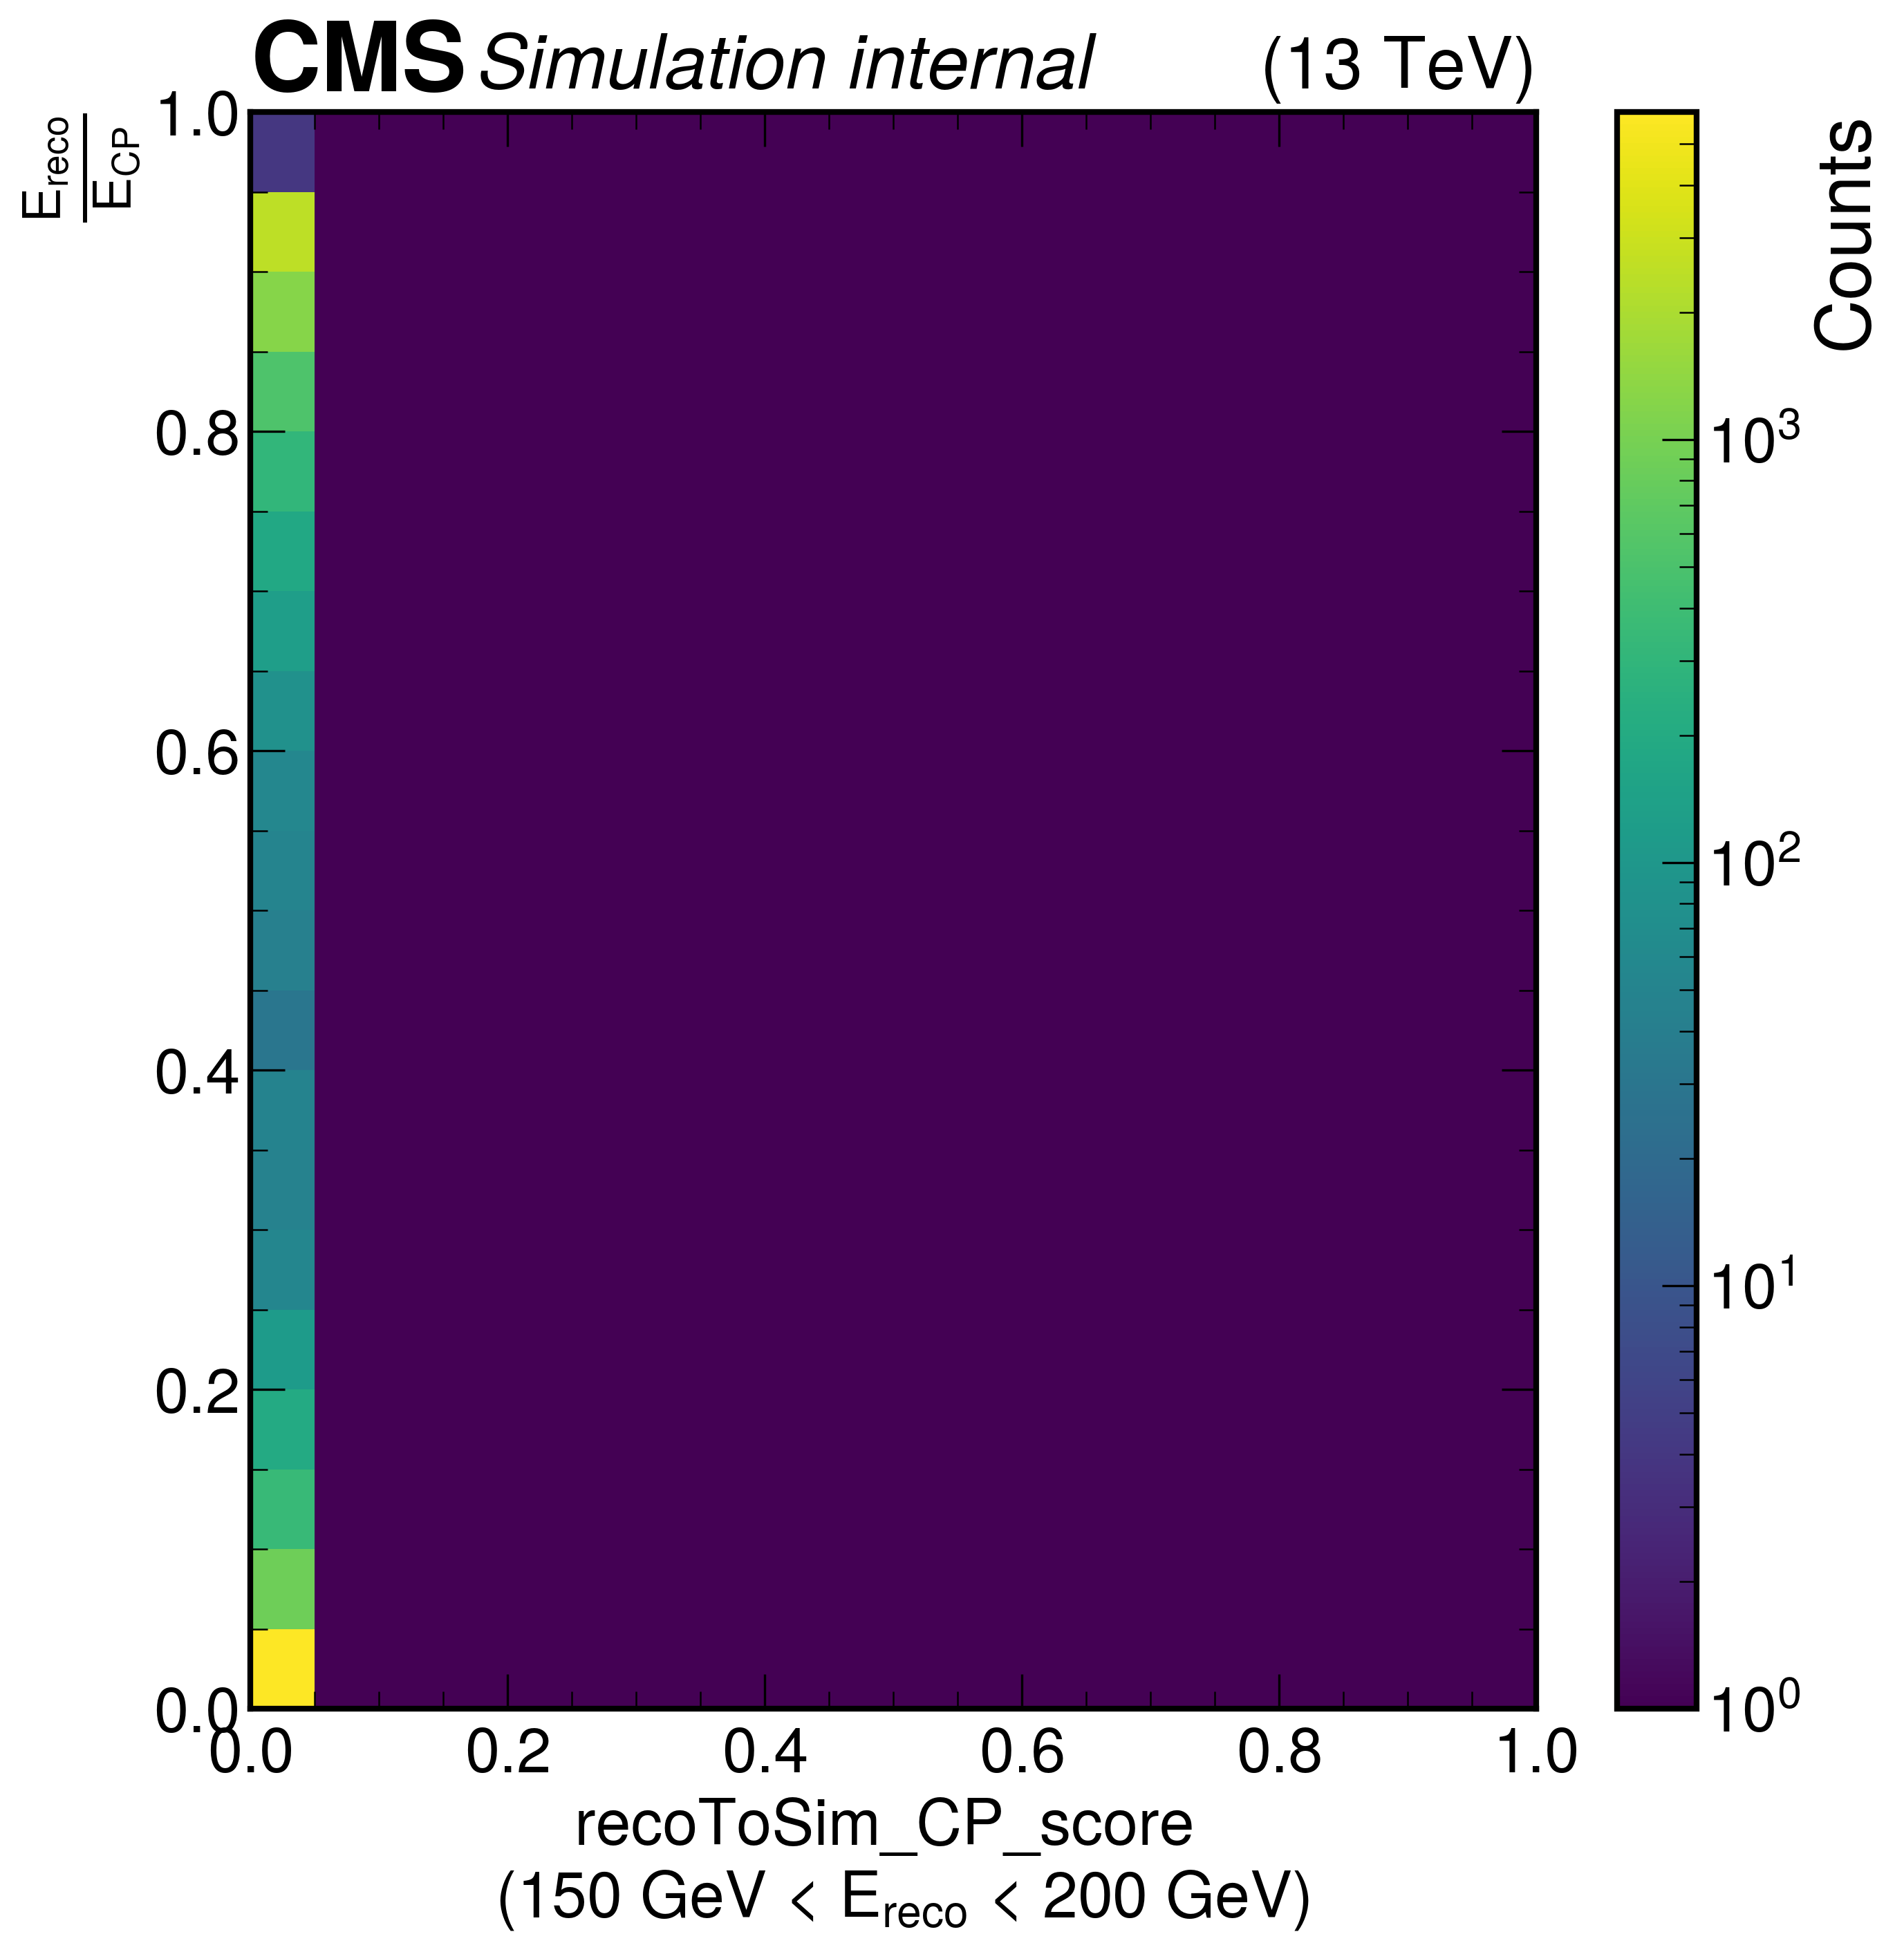

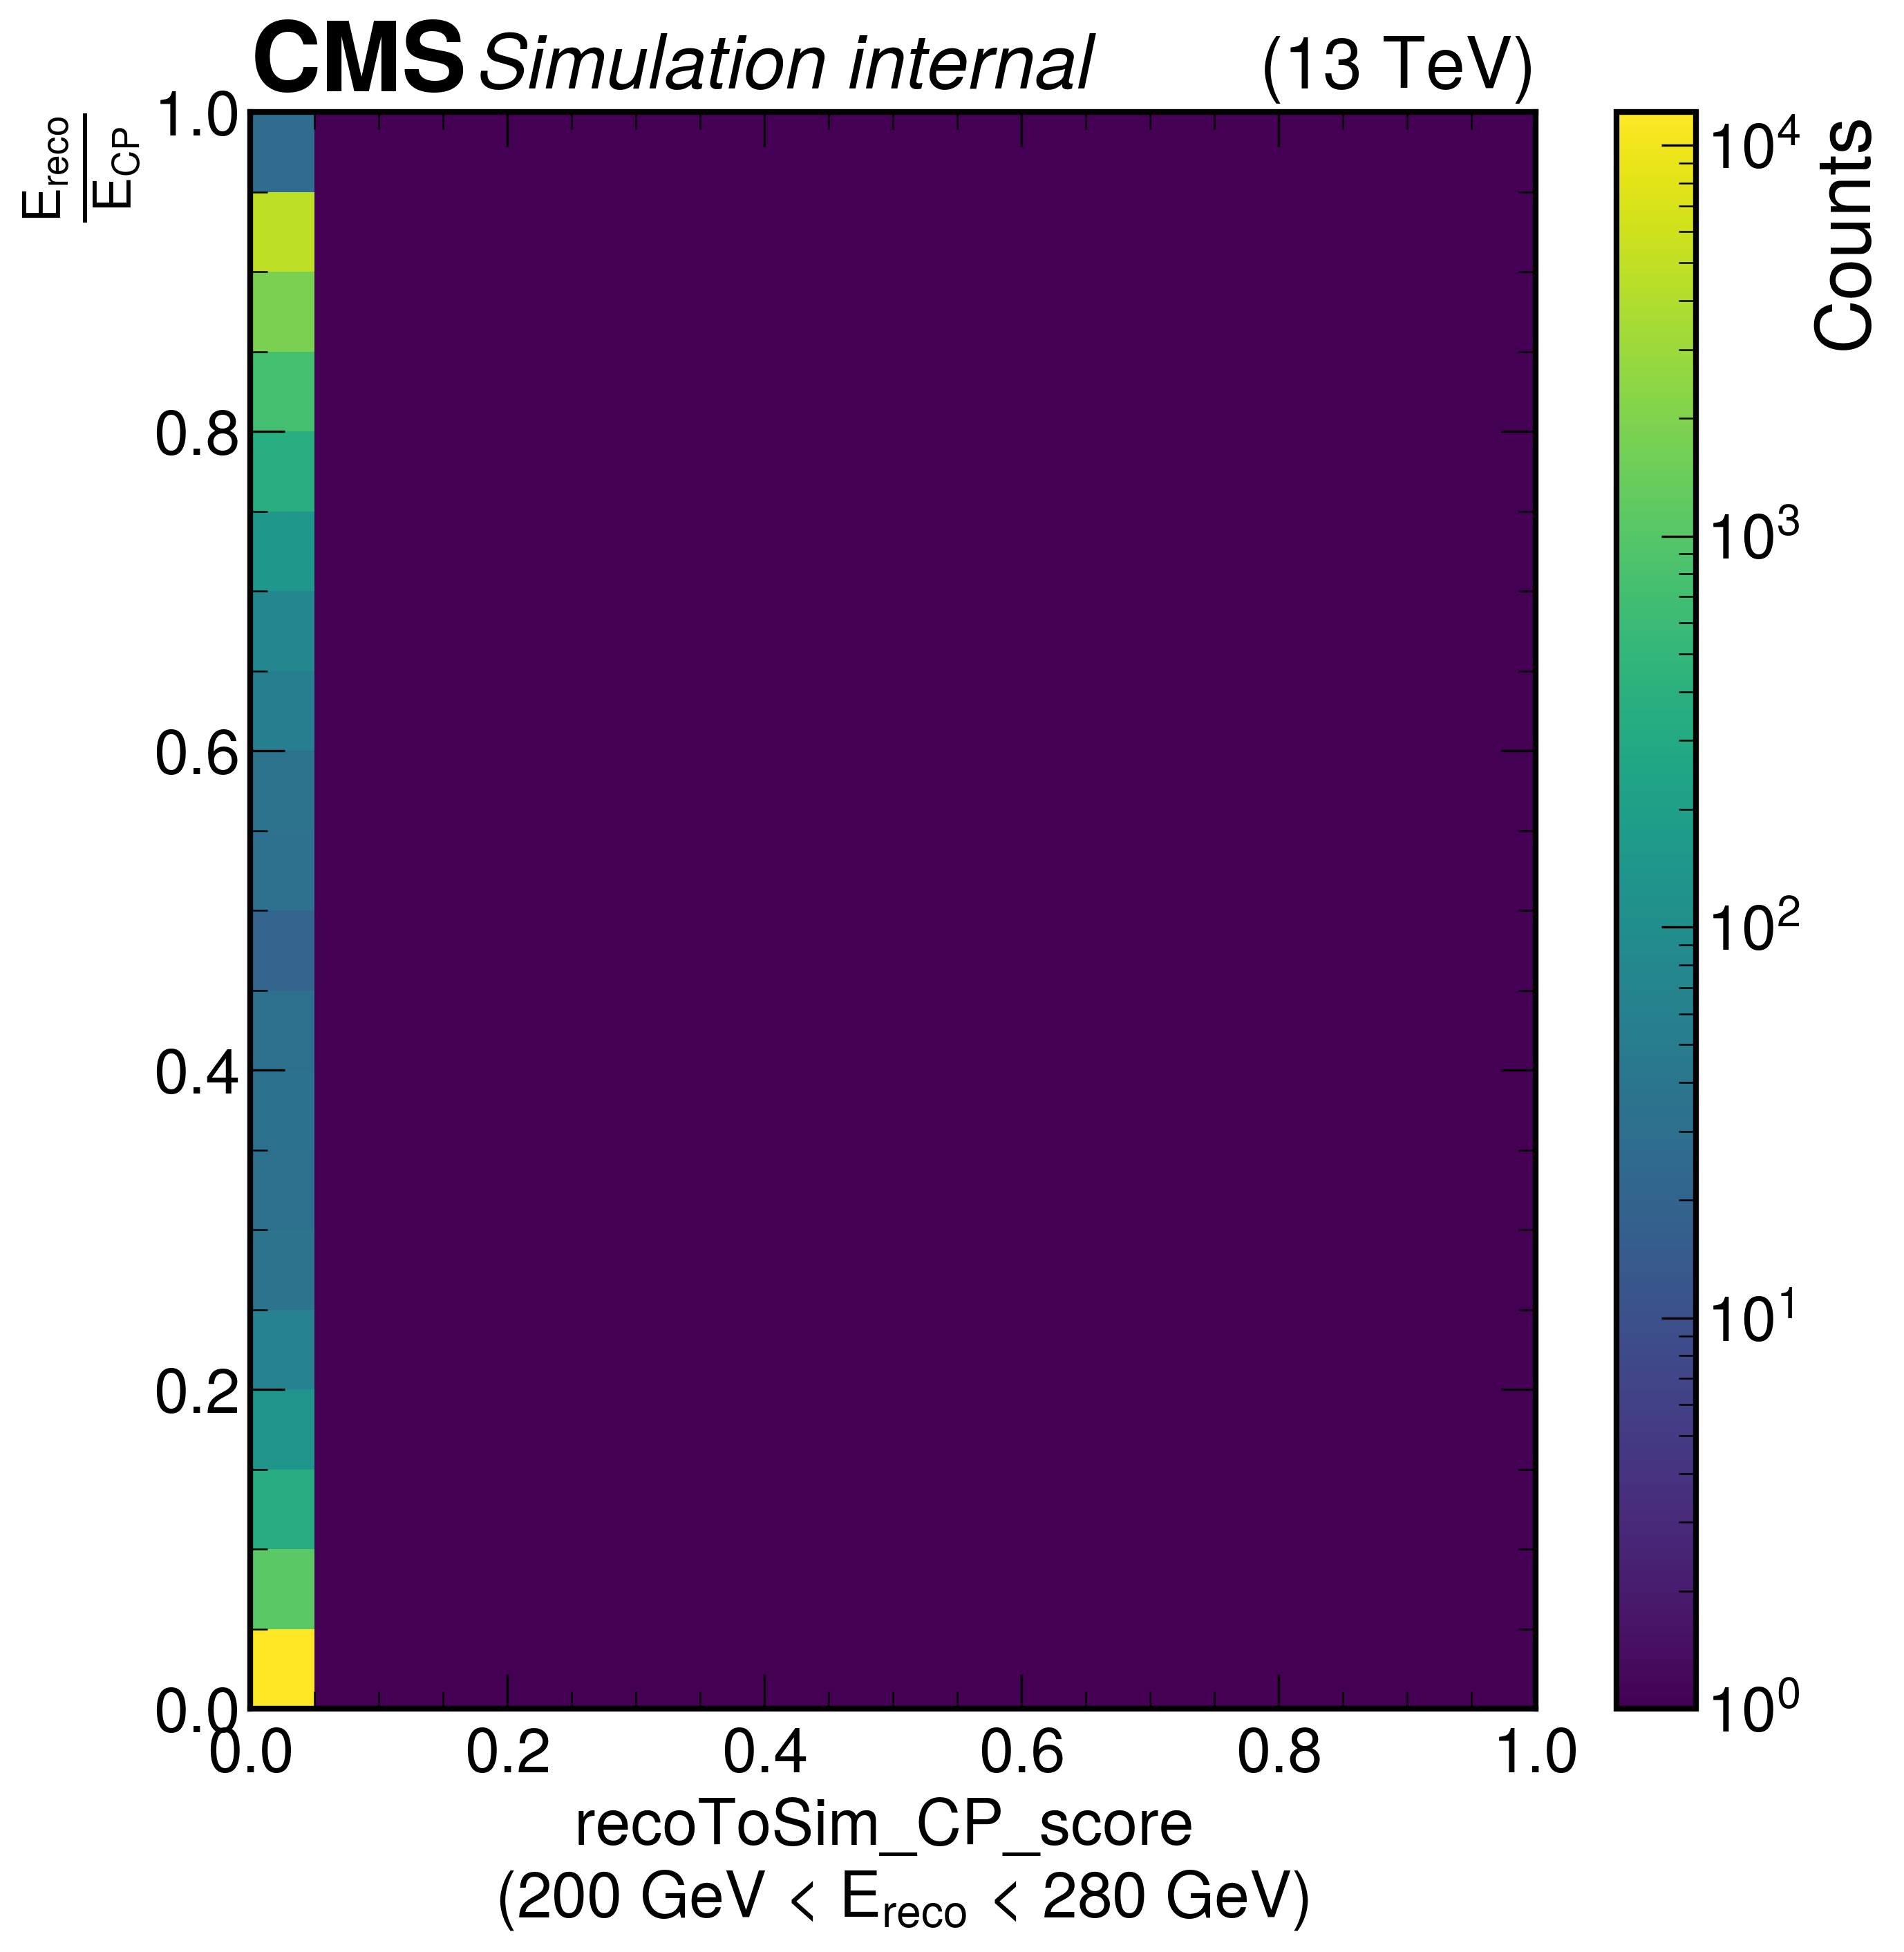

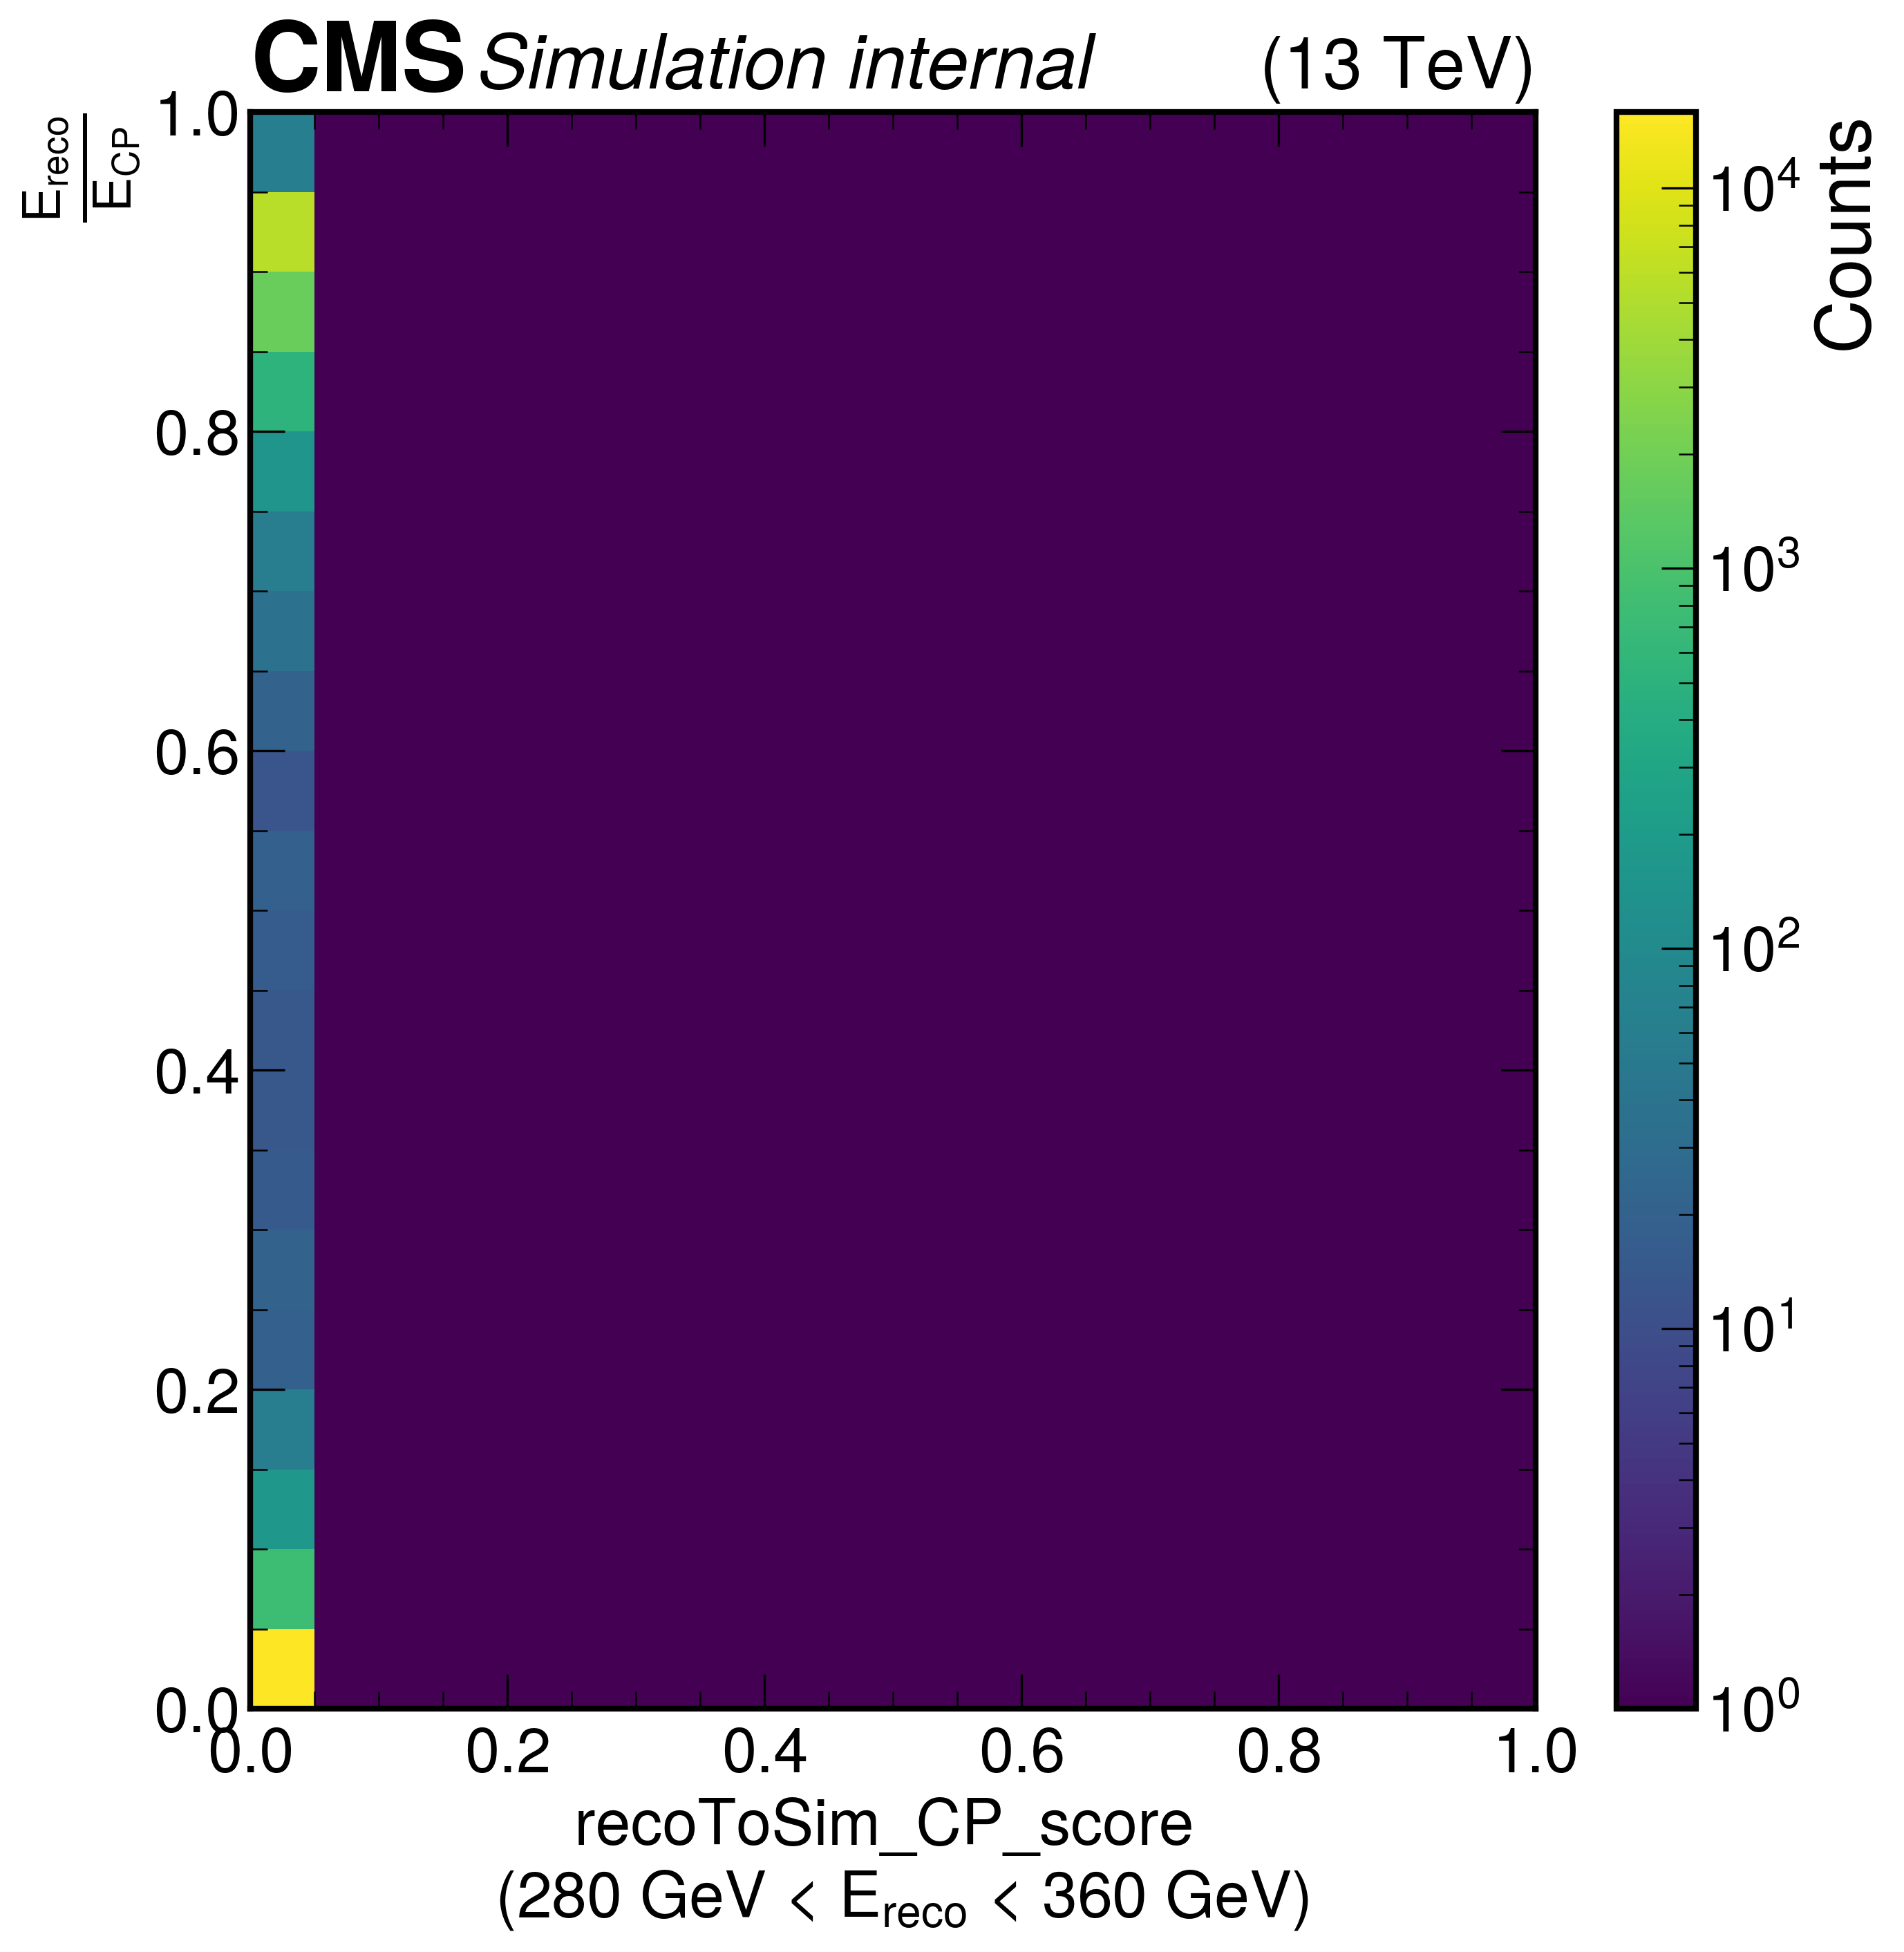

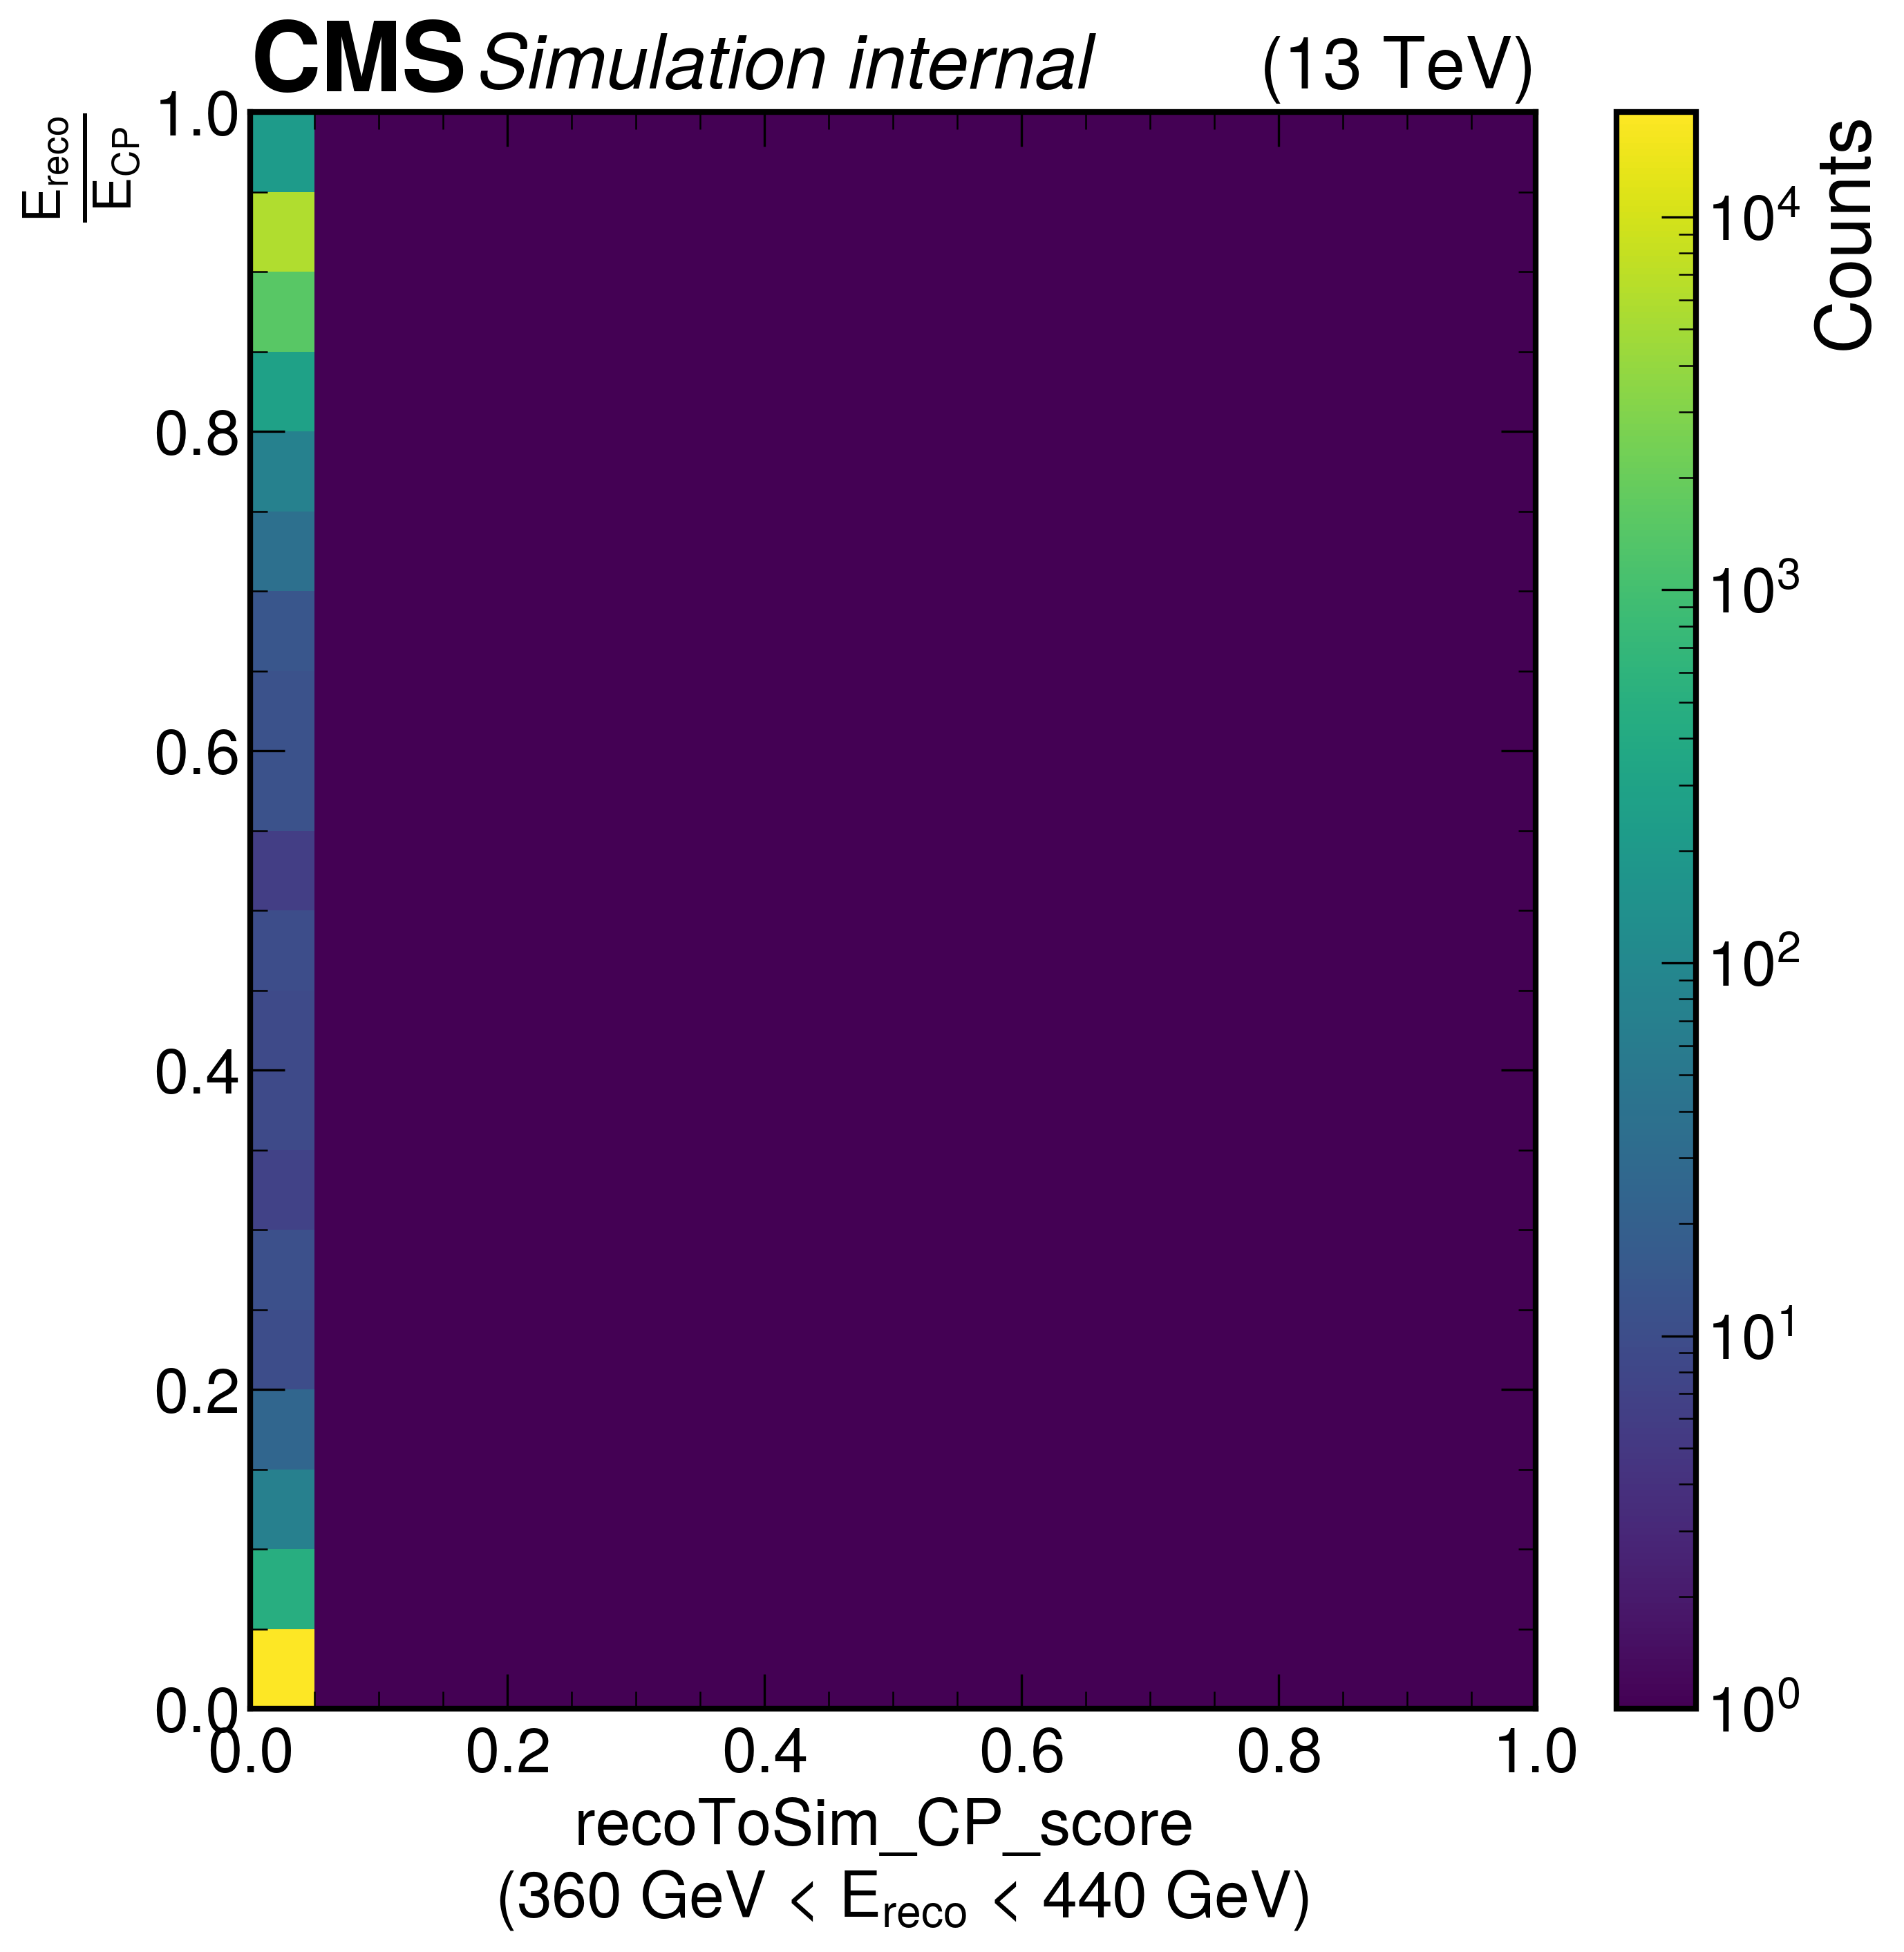

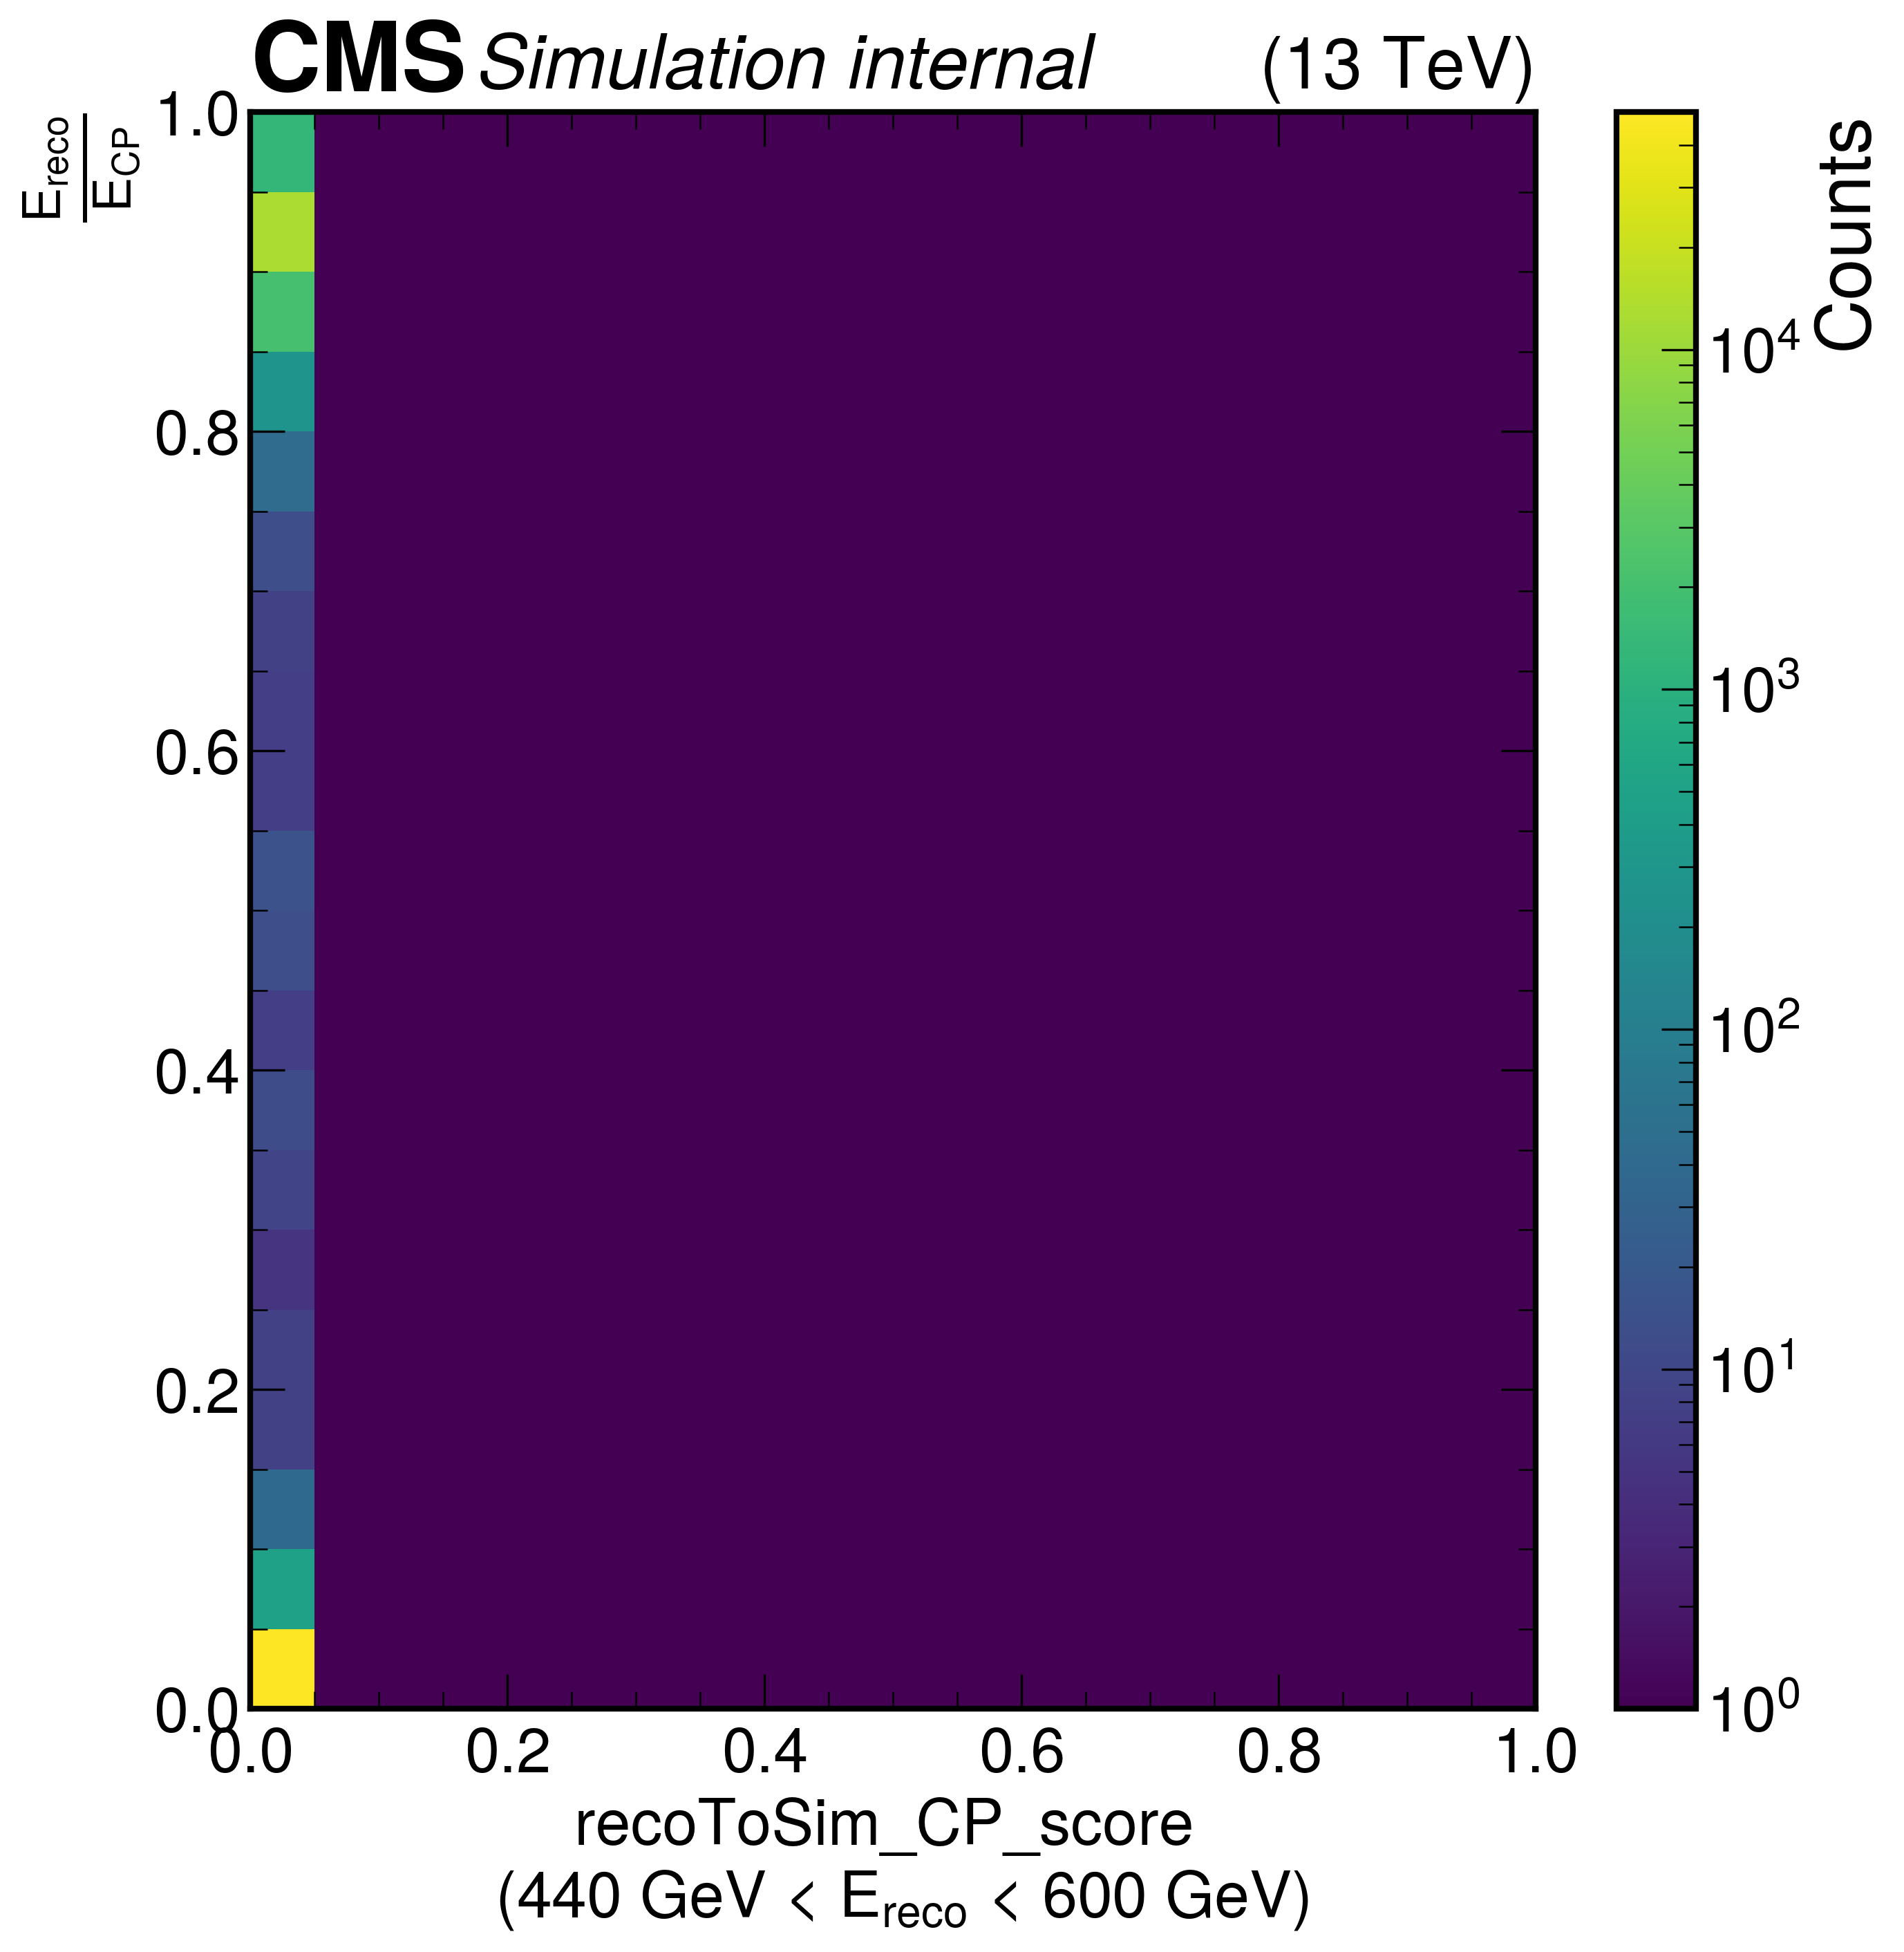

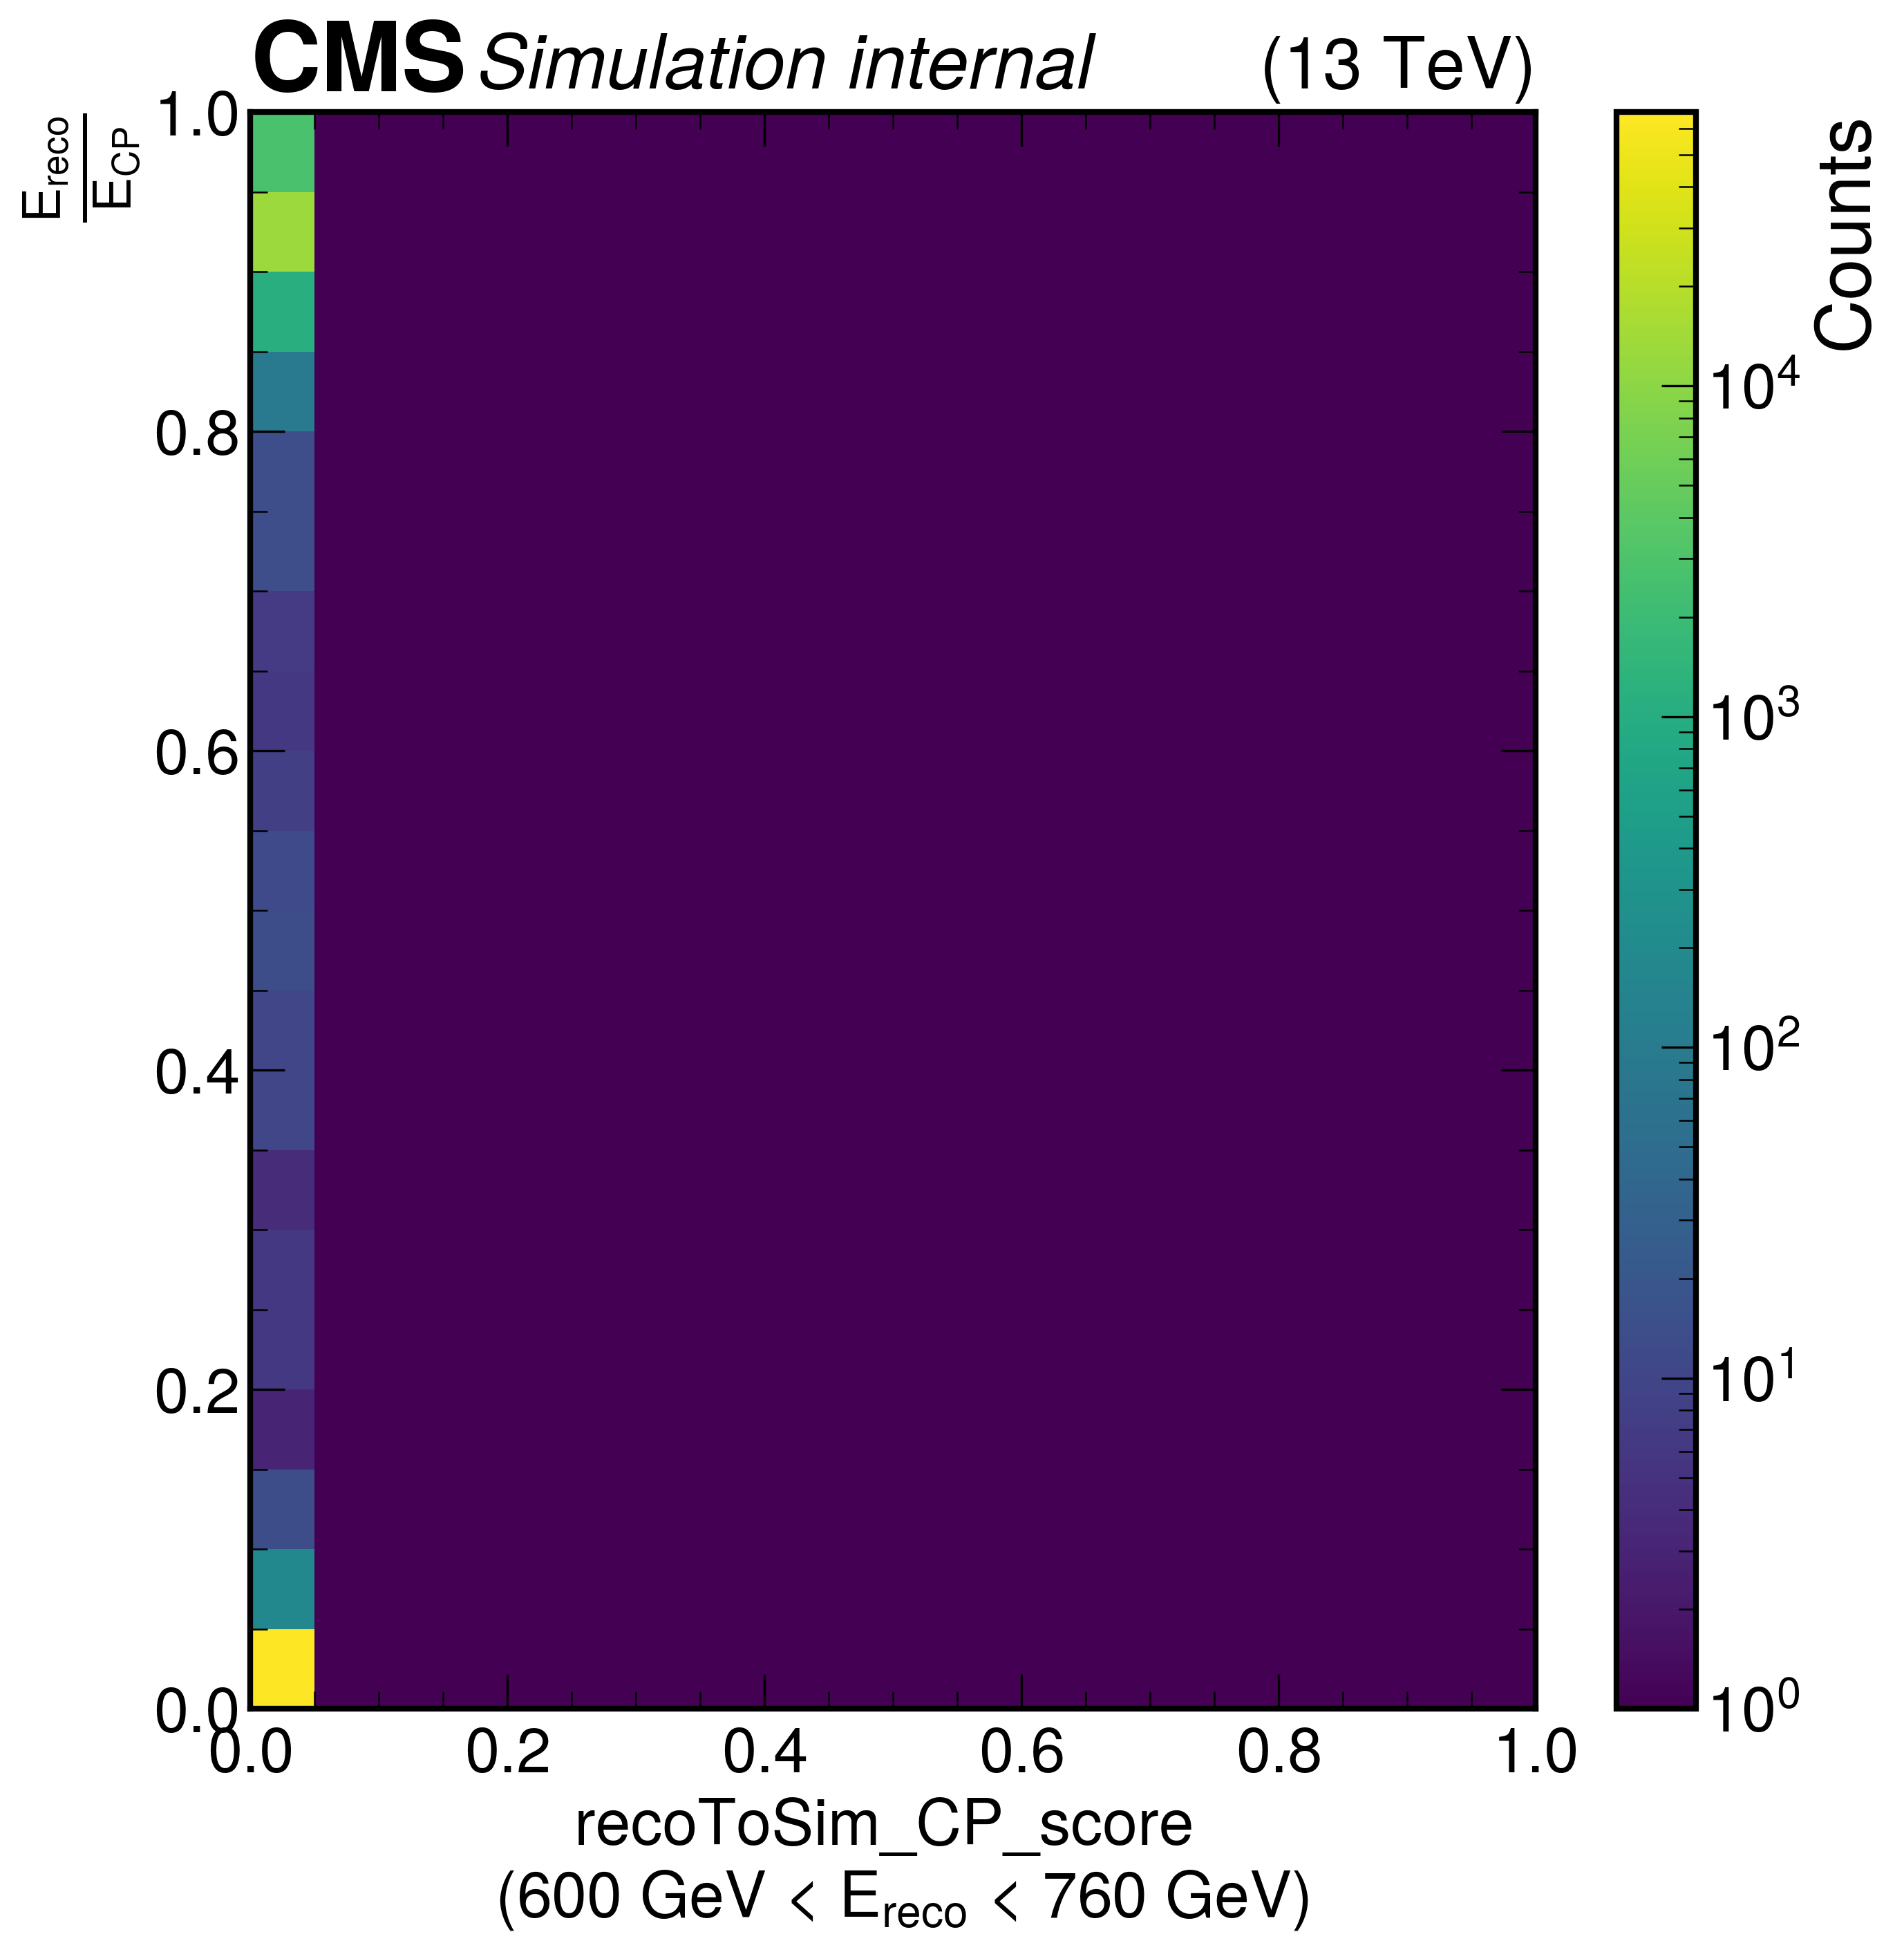

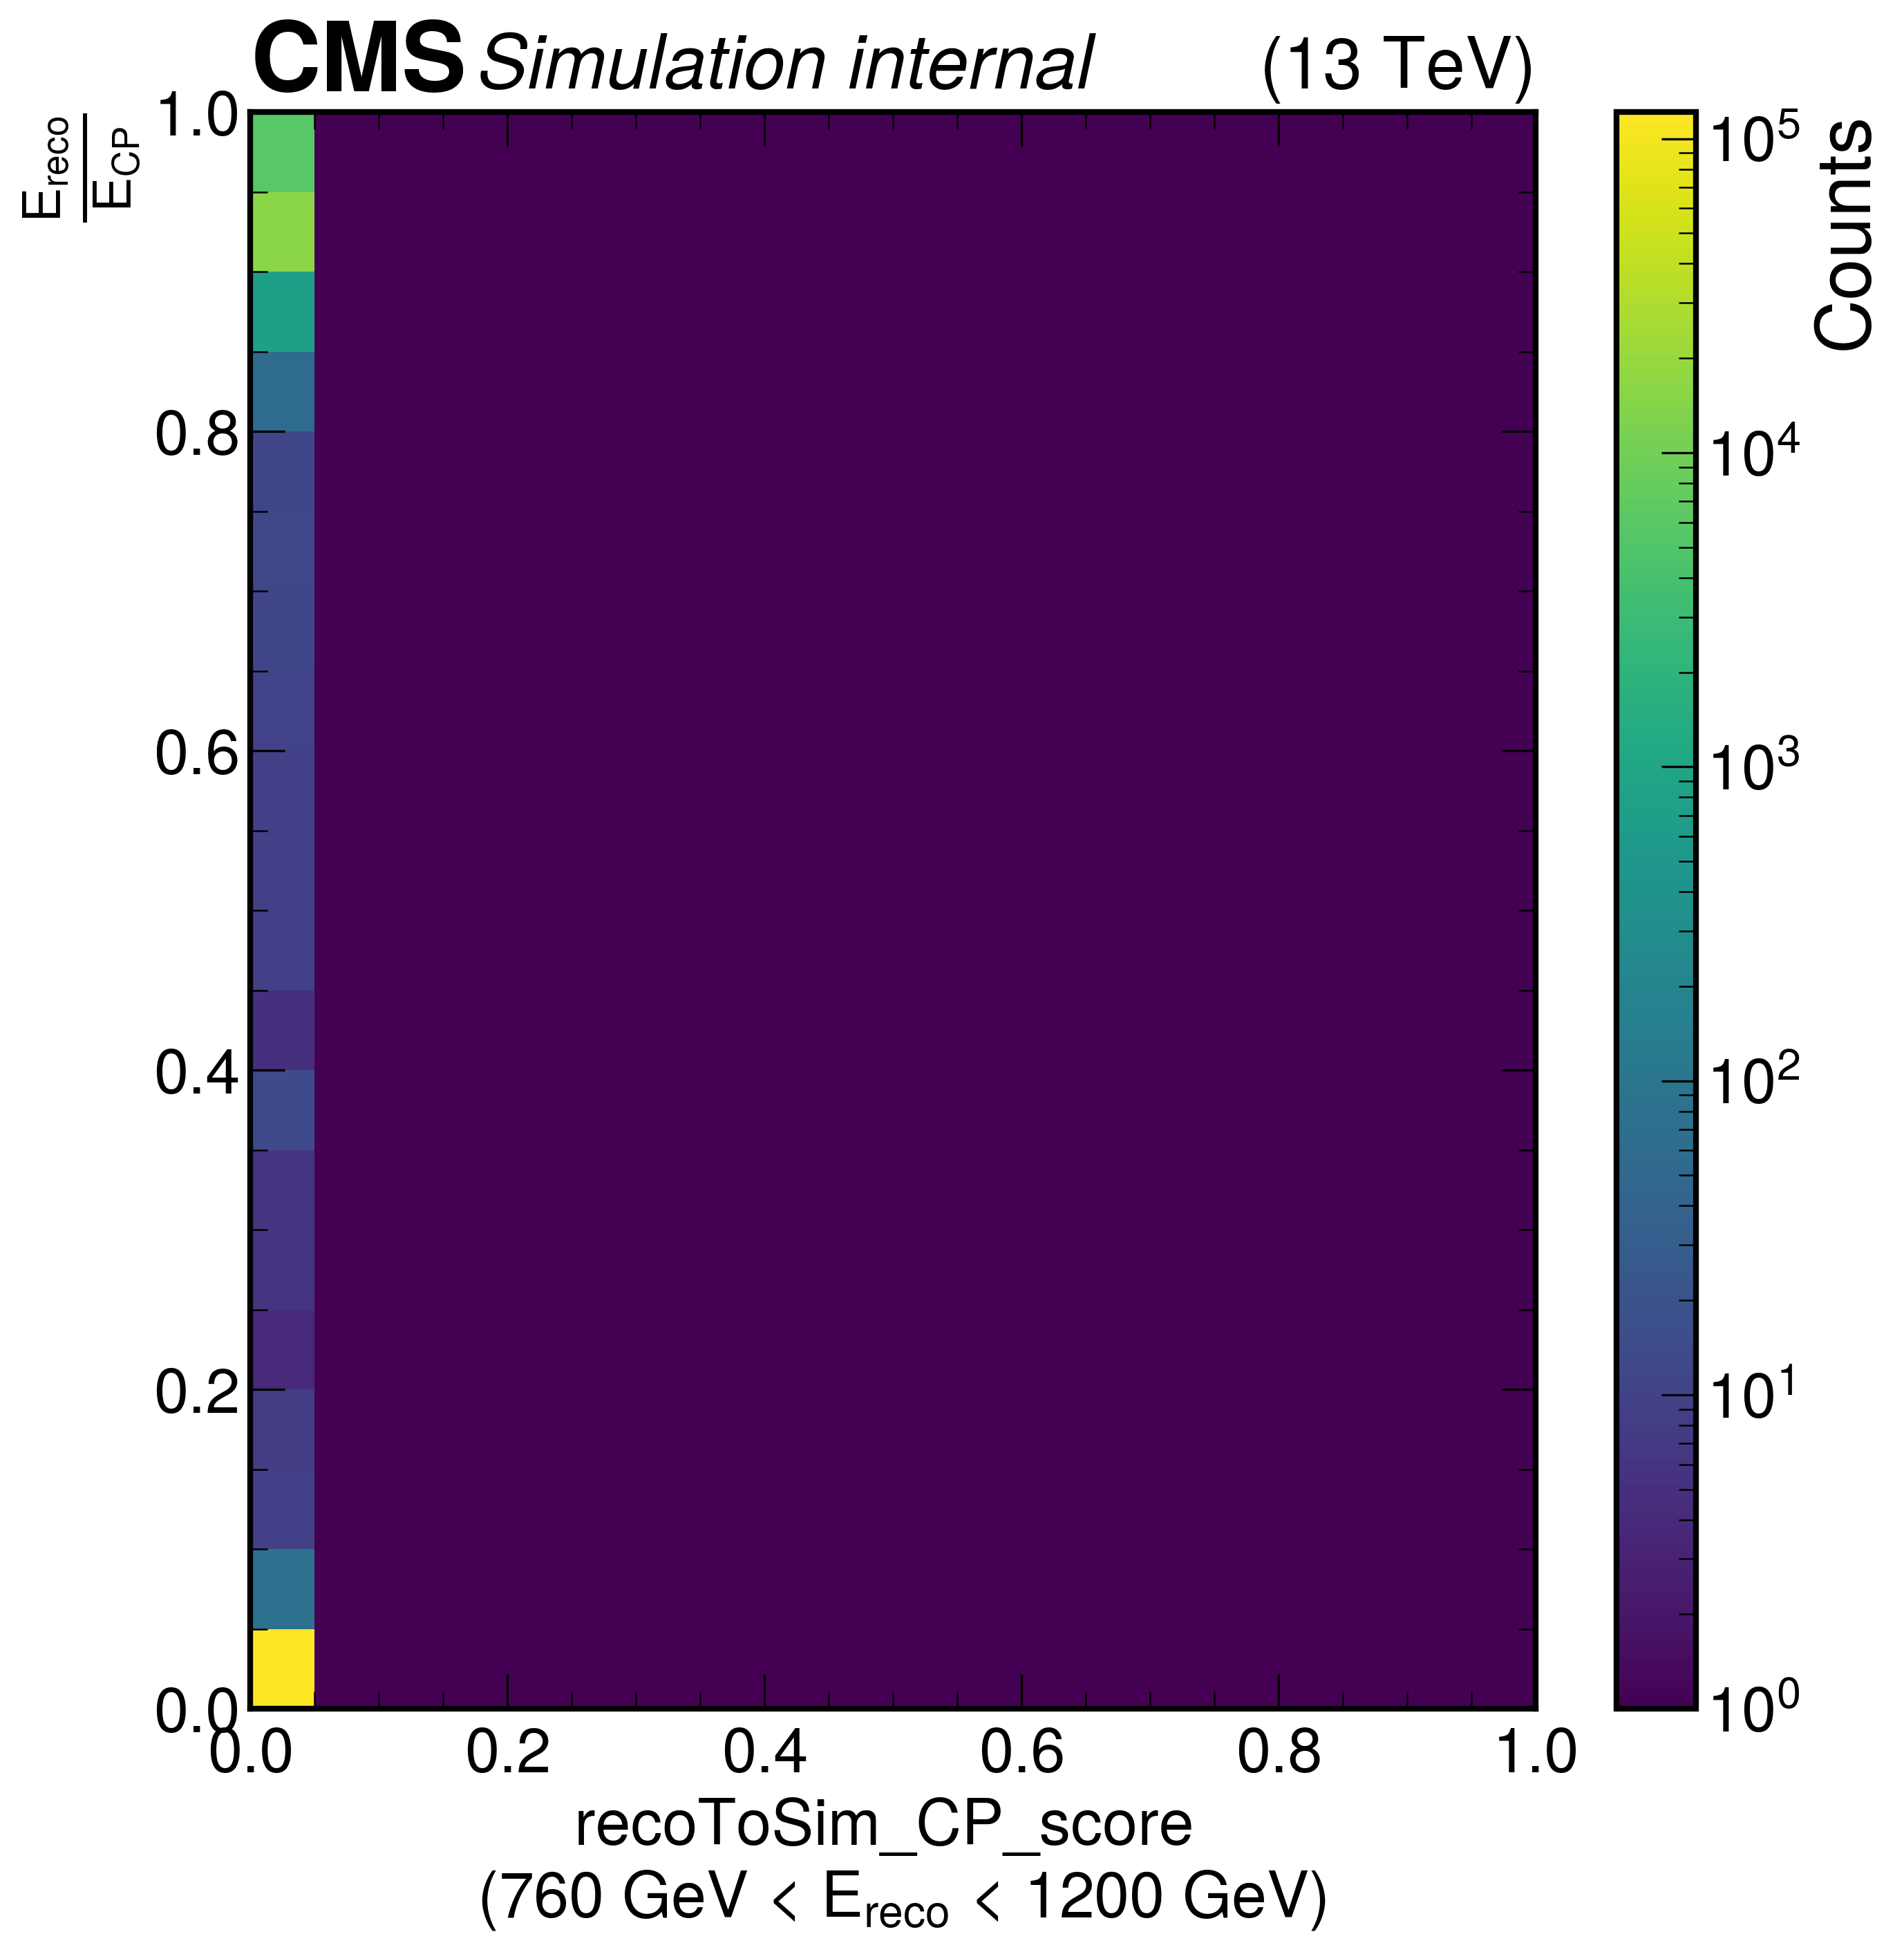

In [6]:
from matplotlib.colors import LogNorm

histo_list = cp_histo_list

hep.style.use("CMS")

for bin in range(len(histo_list)):
    fig, ax = plt.subplots()
    e_min = int(cp_e_bins[bin])
    e_max = int(cp_e_bins[bin + 1])
    label = rf'{e_min} GeV < $E_{{reco}}$ < {e_max} GeV'

    im = ax.pcolormesh(histo_list[bin][2], histo_list[bin][1], histo_list[bin][0], norm=LogNorm(vmin=1, vmax = np.max(histo_list[bin][0])))
    hep.cms.label('internal', loc=0, com=None)
    cbar = fig.colorbar(im)
    ax.set_ylabel(r'$\frac{E_{reco}}{E_{CP}}$')
    #ax.set_ylabel('simToReco_CP_score')
    ax.set_xlabel(f'recoToSim_CP_score \n ({label})', loc='center', fontsize=22)

    #cbar.set_ticklabels([f'$10^{{{i}}}$' for i in cbar.get_ticks()])
    cbar.set_label('Counts')
    #plt.savefig(f'recoToSim_vs_E_fraction_E_cp_{e_min}_{e_max}.png')
    #plt.savefig(f'recoToSim_vs_simToReco_E_reco_{e_min}_{e_max}.png')



In [ ]:
histo_list = cp_histo_list

hep.style.use("CMS")

for bin in range(len(histo_list)):
    fig, ax = plt.subplots()
    e_min = int(cp_e_bins[bin])
    e_max = int(cp_e_bins[bin + 1])
    label = rf'{e_min} GeV < $E_{{CP}}$ < {e_max} GeV'

    data_1D = histo_list[bin][0].T[0]
    bar_centers = (histo_list[bin][1][1:] + histo_list[bin][1][:-1])/2
    bar_widths = histo_list[bin][1][1:] - histo_list[bin][1][:-1]

    ax.bar(bar_centers, data_1D, bar_widths, log=True, label=label)
    hep.cms.label('internal', loc=0, com=None)
    ax.set_xlabel(r'$E_{reco}/E_{CP}$ (0 < recoToSim_CP < 0.05)', fontsize = 22)
    #ax.set_xlabel('simToReco_CP (0 < recoToSim_CP < 0.05)', fontsize = 22)
    ax.set_ylabel('Counts')
    ax.set_xbound(0.0, 1.)
    ax.legend()
    plt.savefig(f'E_fraction_recoToSim_0_05_E_cp_{e_min}_{e_max}.png')
    #plt.savefig(f'simToReco_recoToSim_0_05_E_reco_{e_min}_{e_max}.png')


In [18]:
e_trackster = tfile.openArray('ticlDumper/trackstersCLUE3DHigh', 'raw_energy')
e_superclusters = tfile.openArray('ticlDumper/trackstersTiclCandidate', 'raw_energy')
e_sc = tfile.openArray('ticlDumper/simtrackstersSC', 'raw_energy')
e_cp = tfile.openArray('ticlDumper/simtrackstersCP', 'raw_energy')
e_gen = tfile.openArray('ticlDumper/simtrackstersCP', 'regressed_energy')

e_data = {
    'trackster': e_trackster,
    'supercluster': e_superclusters,
    'sc': e_sc,
    'cp': e_cp,
    'gen': e_gen
}

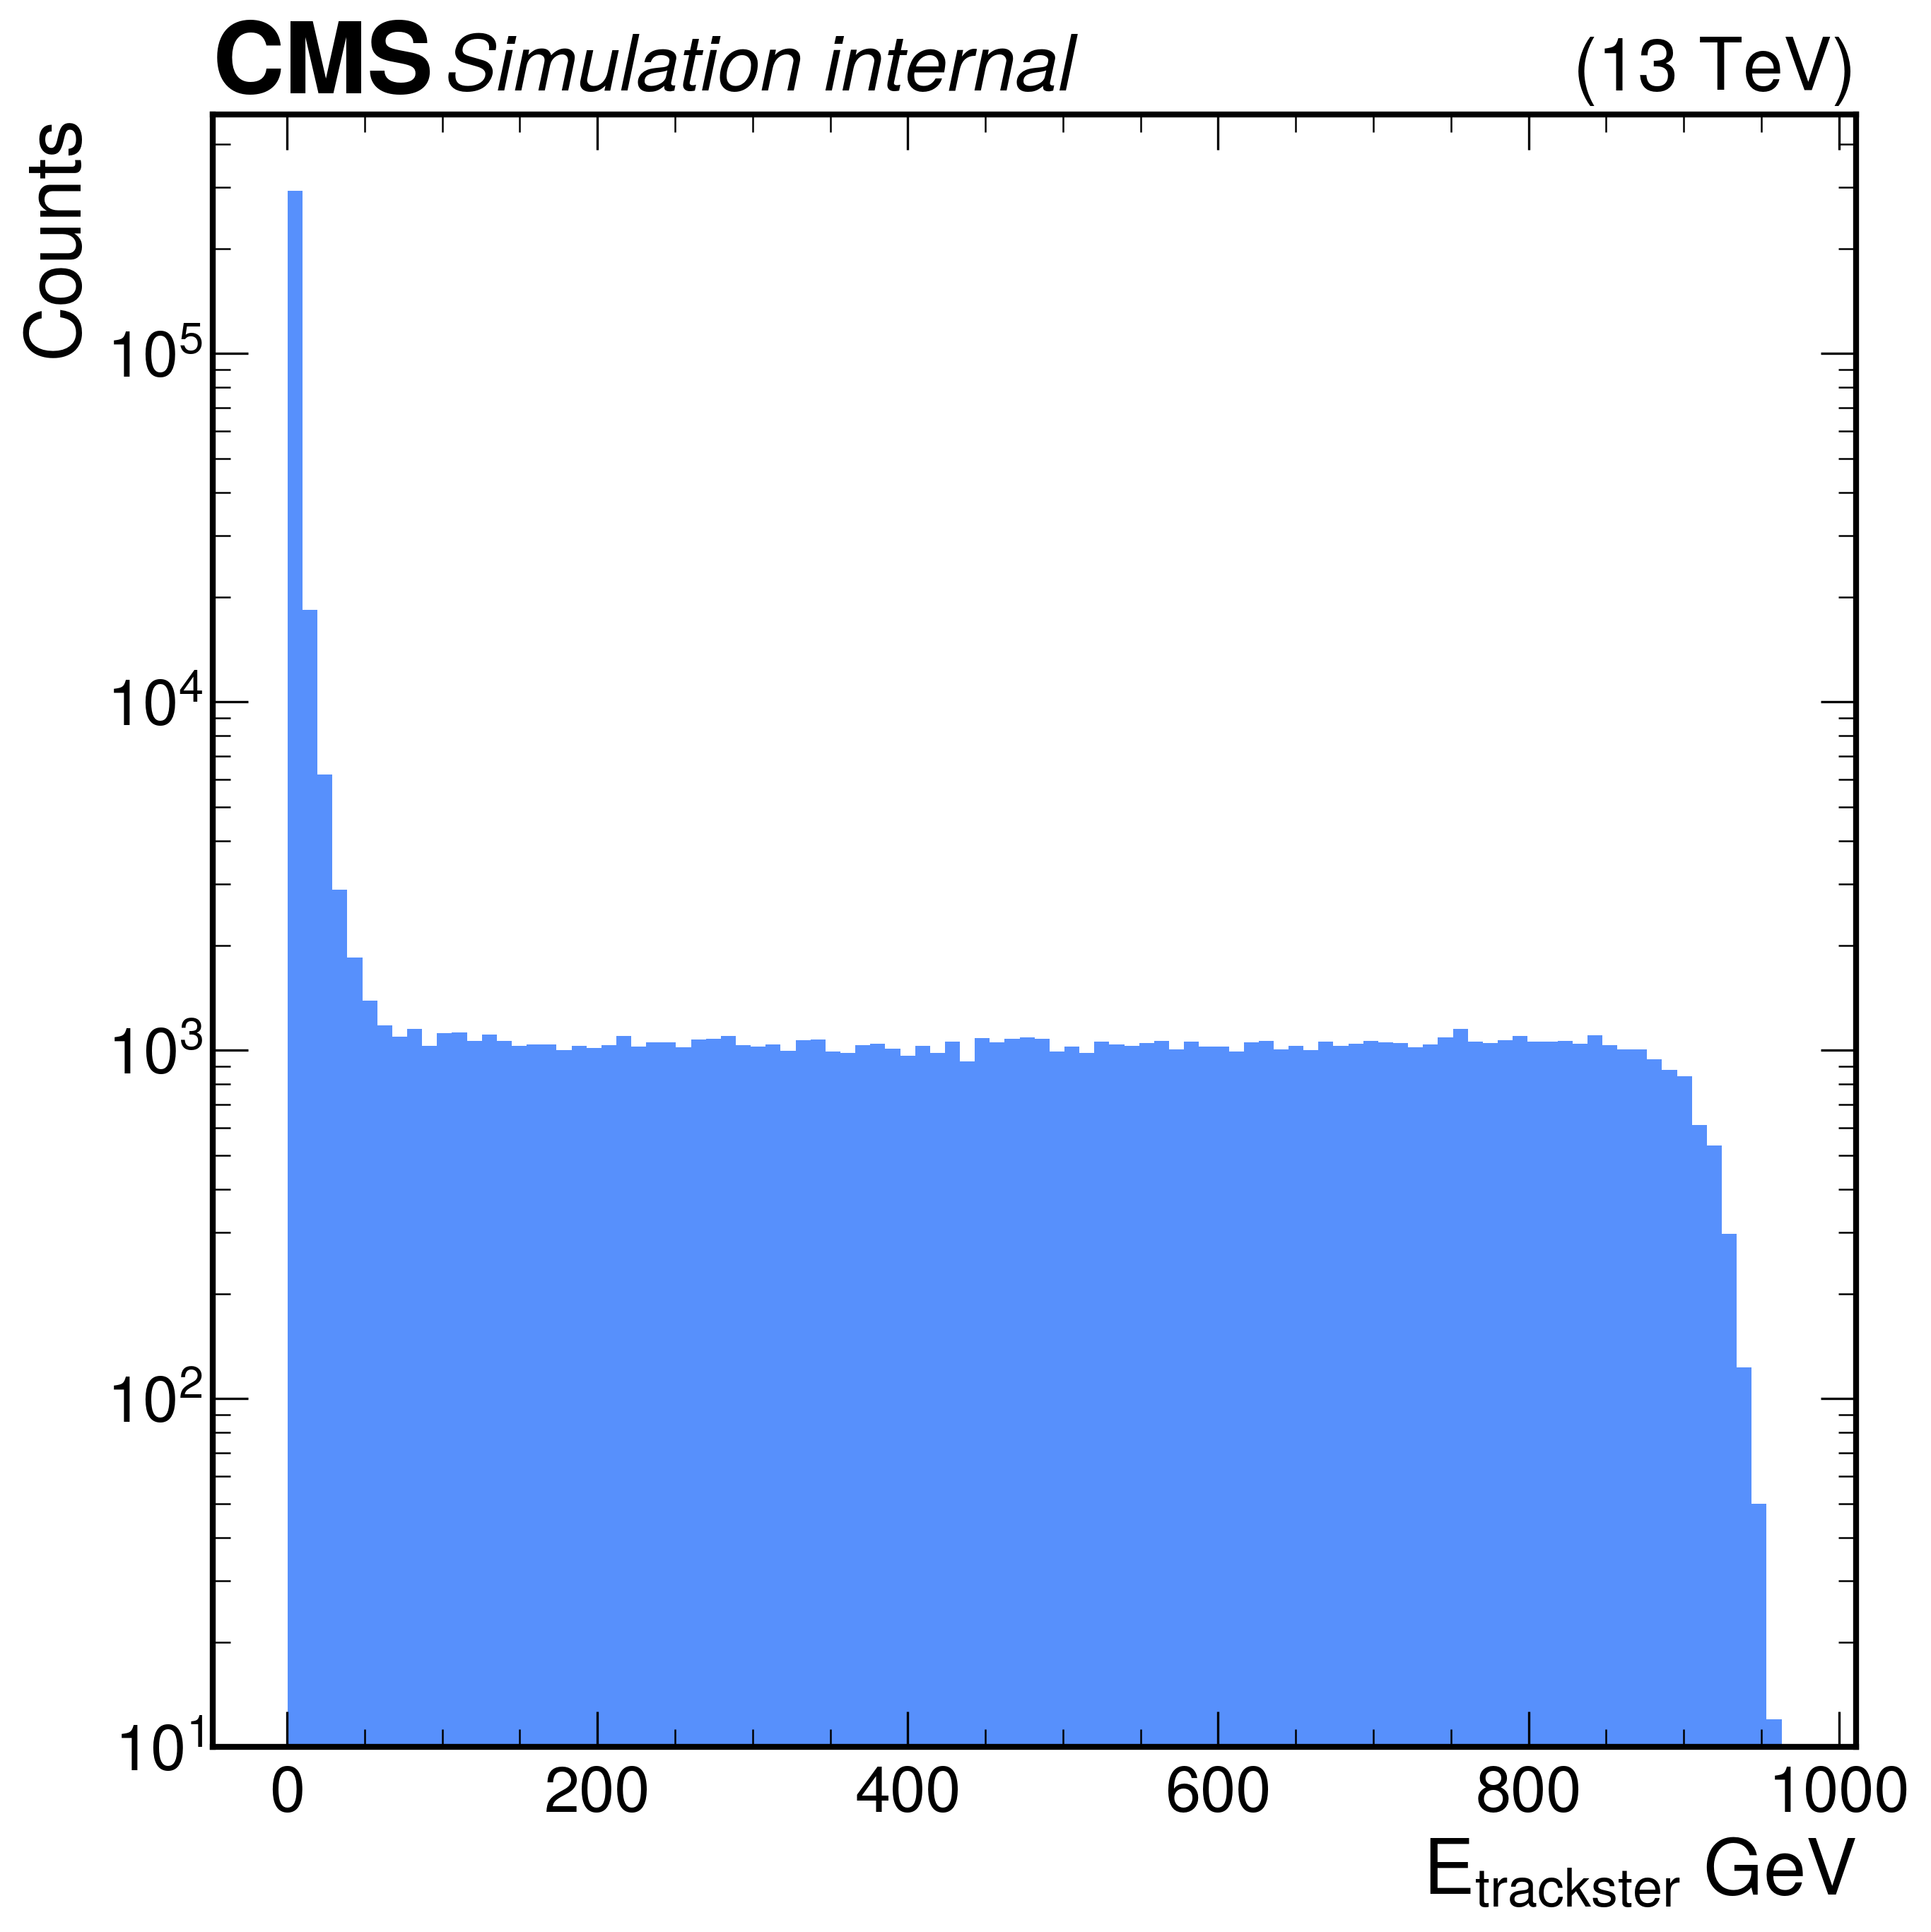

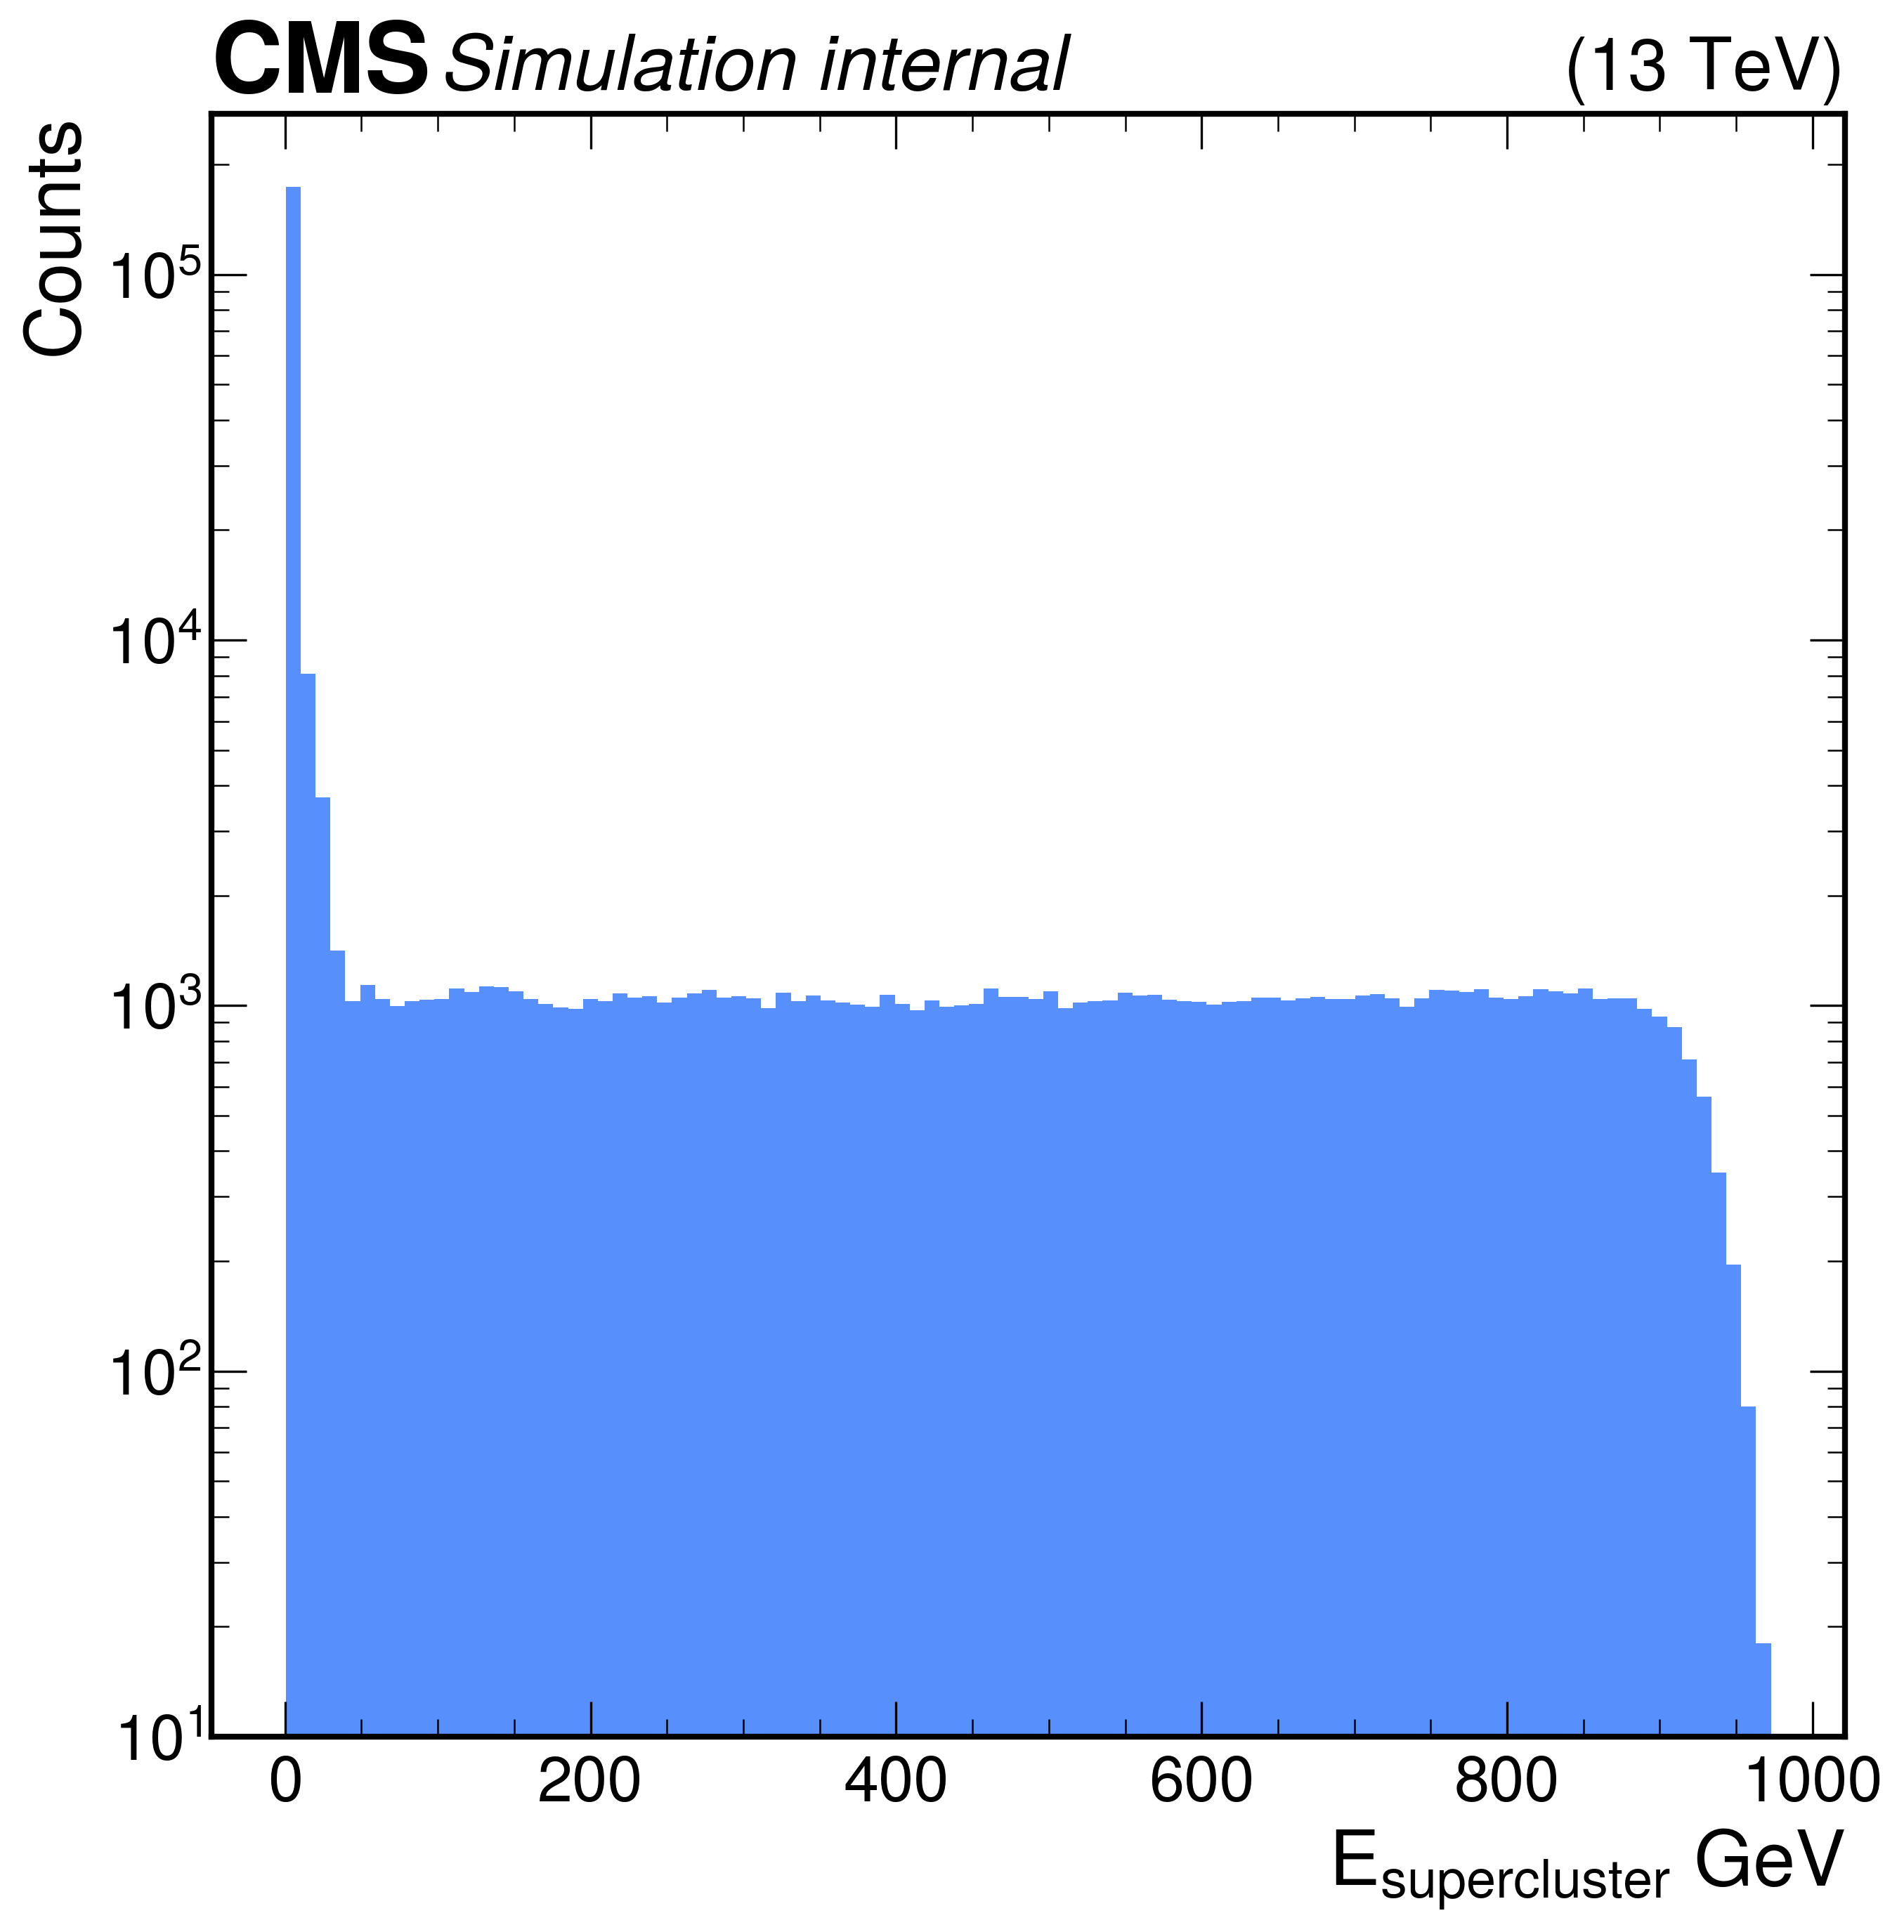

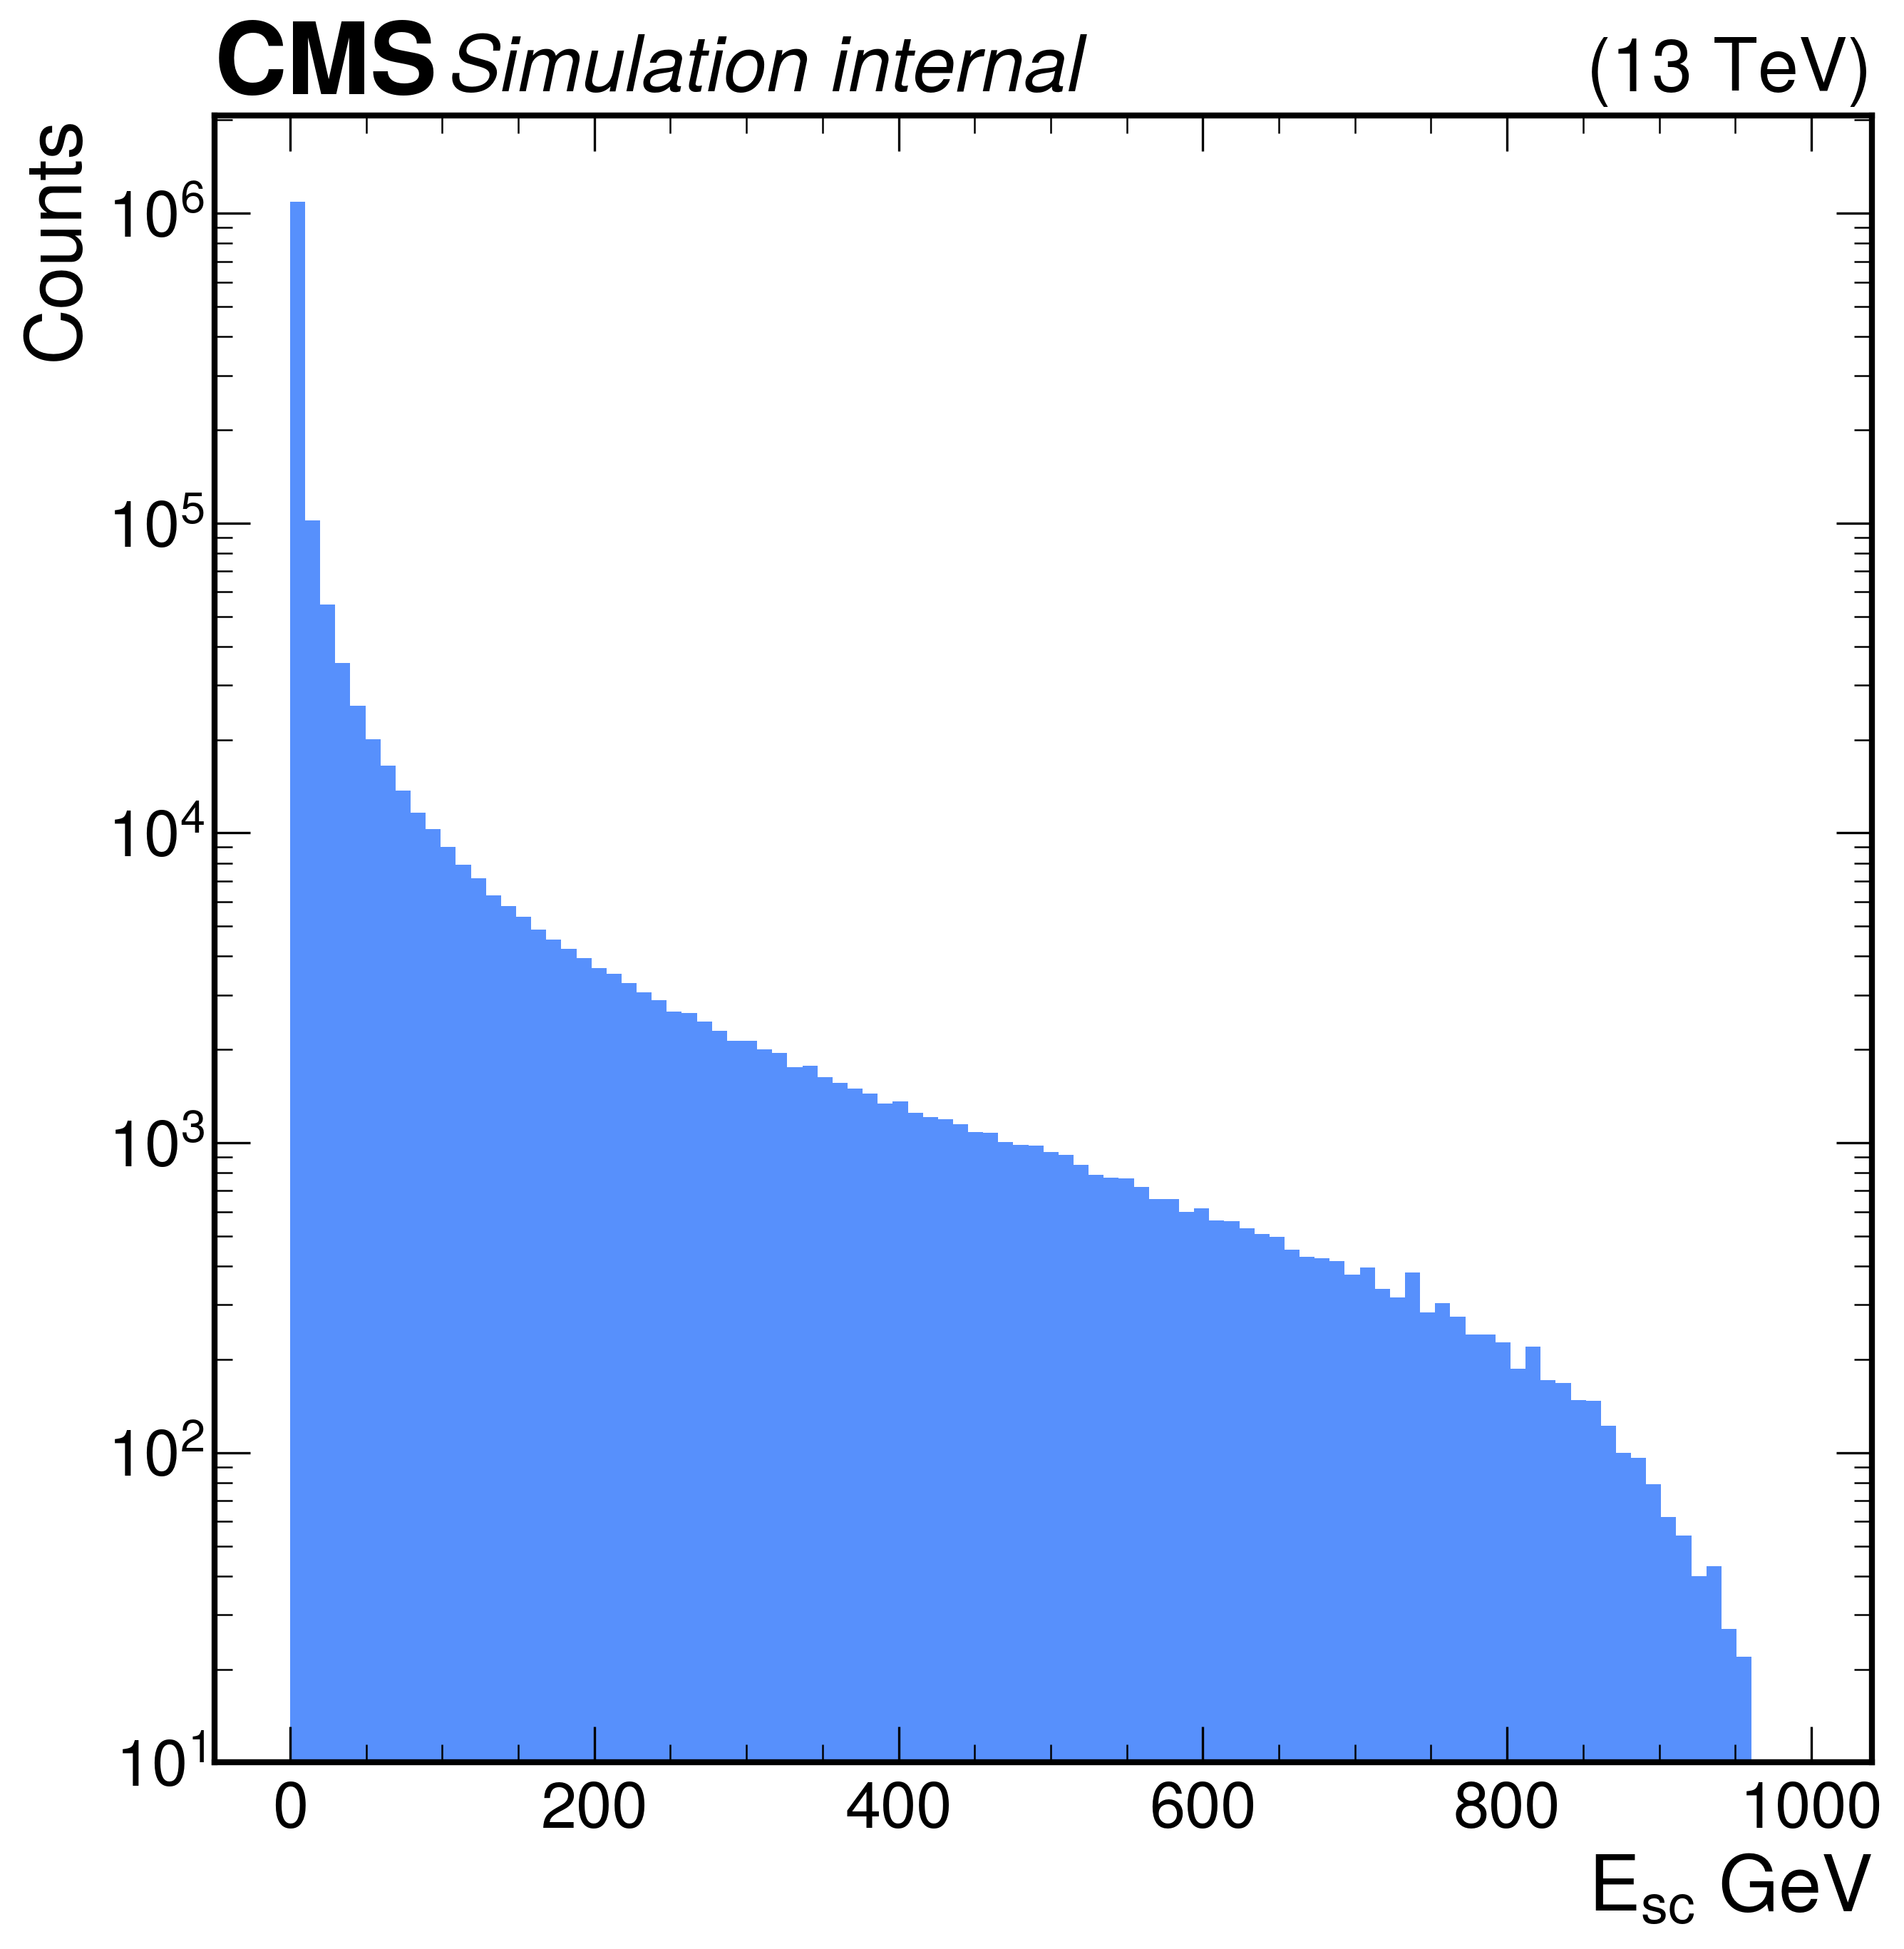

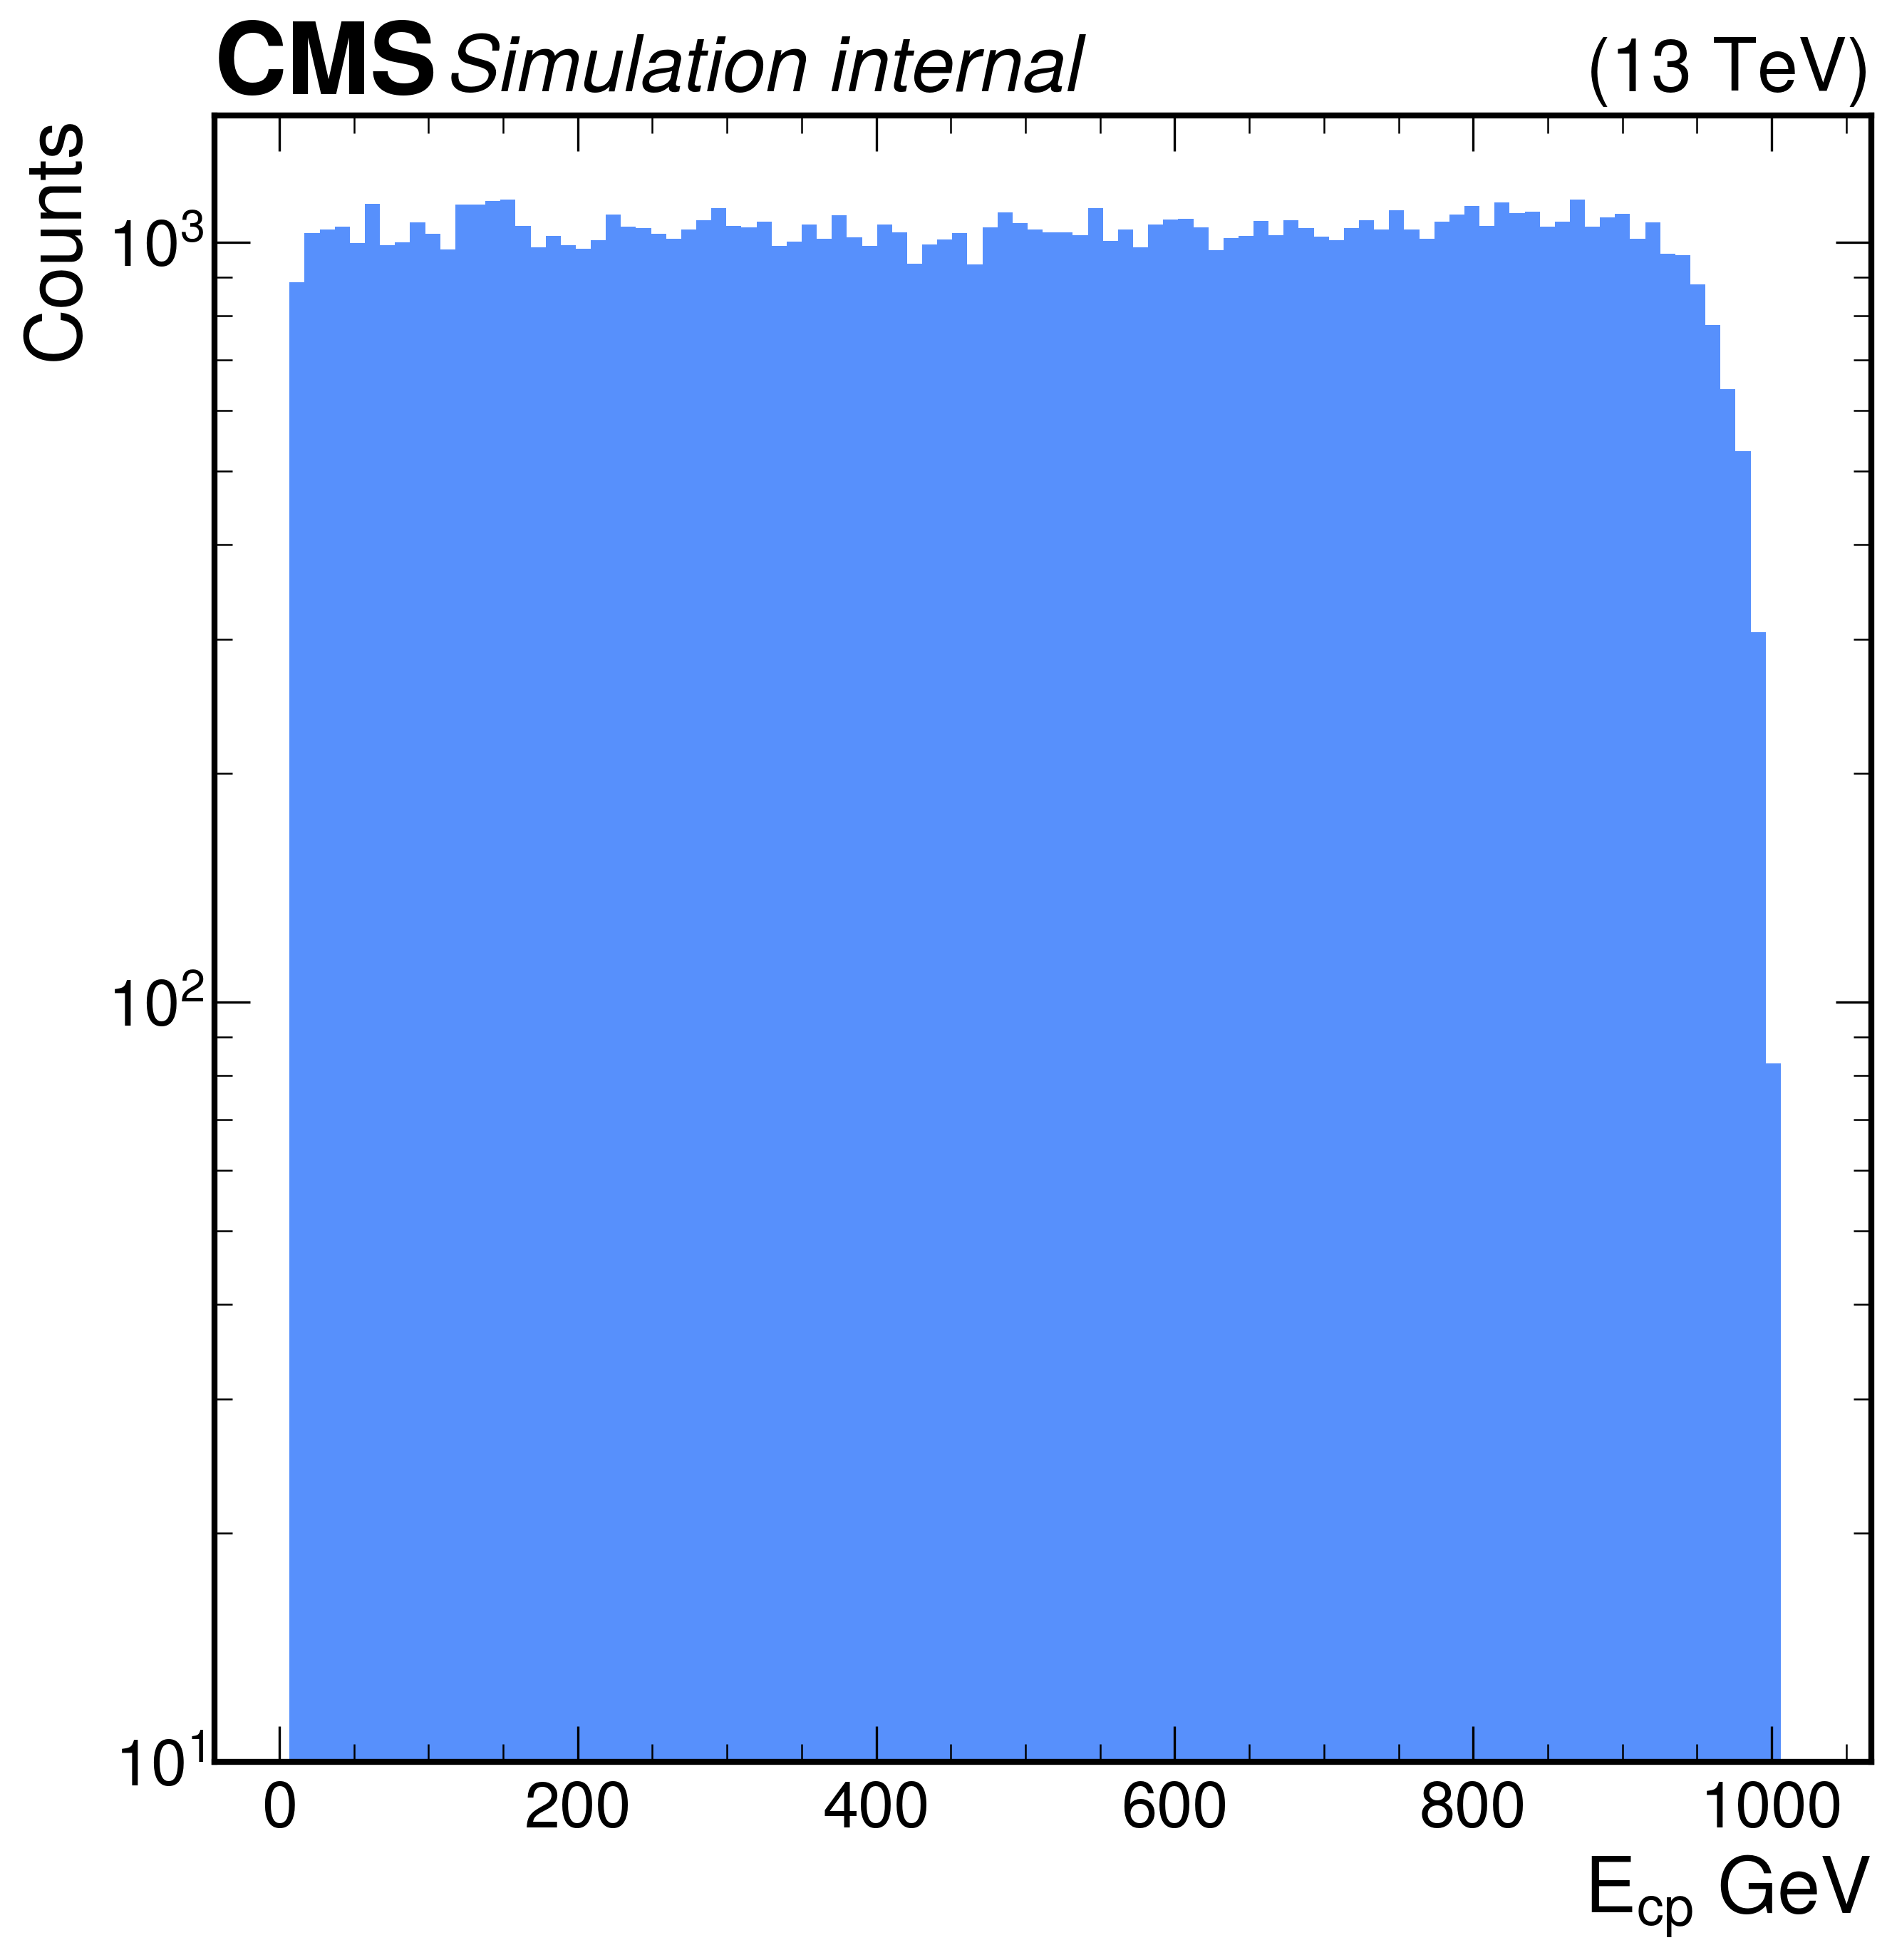

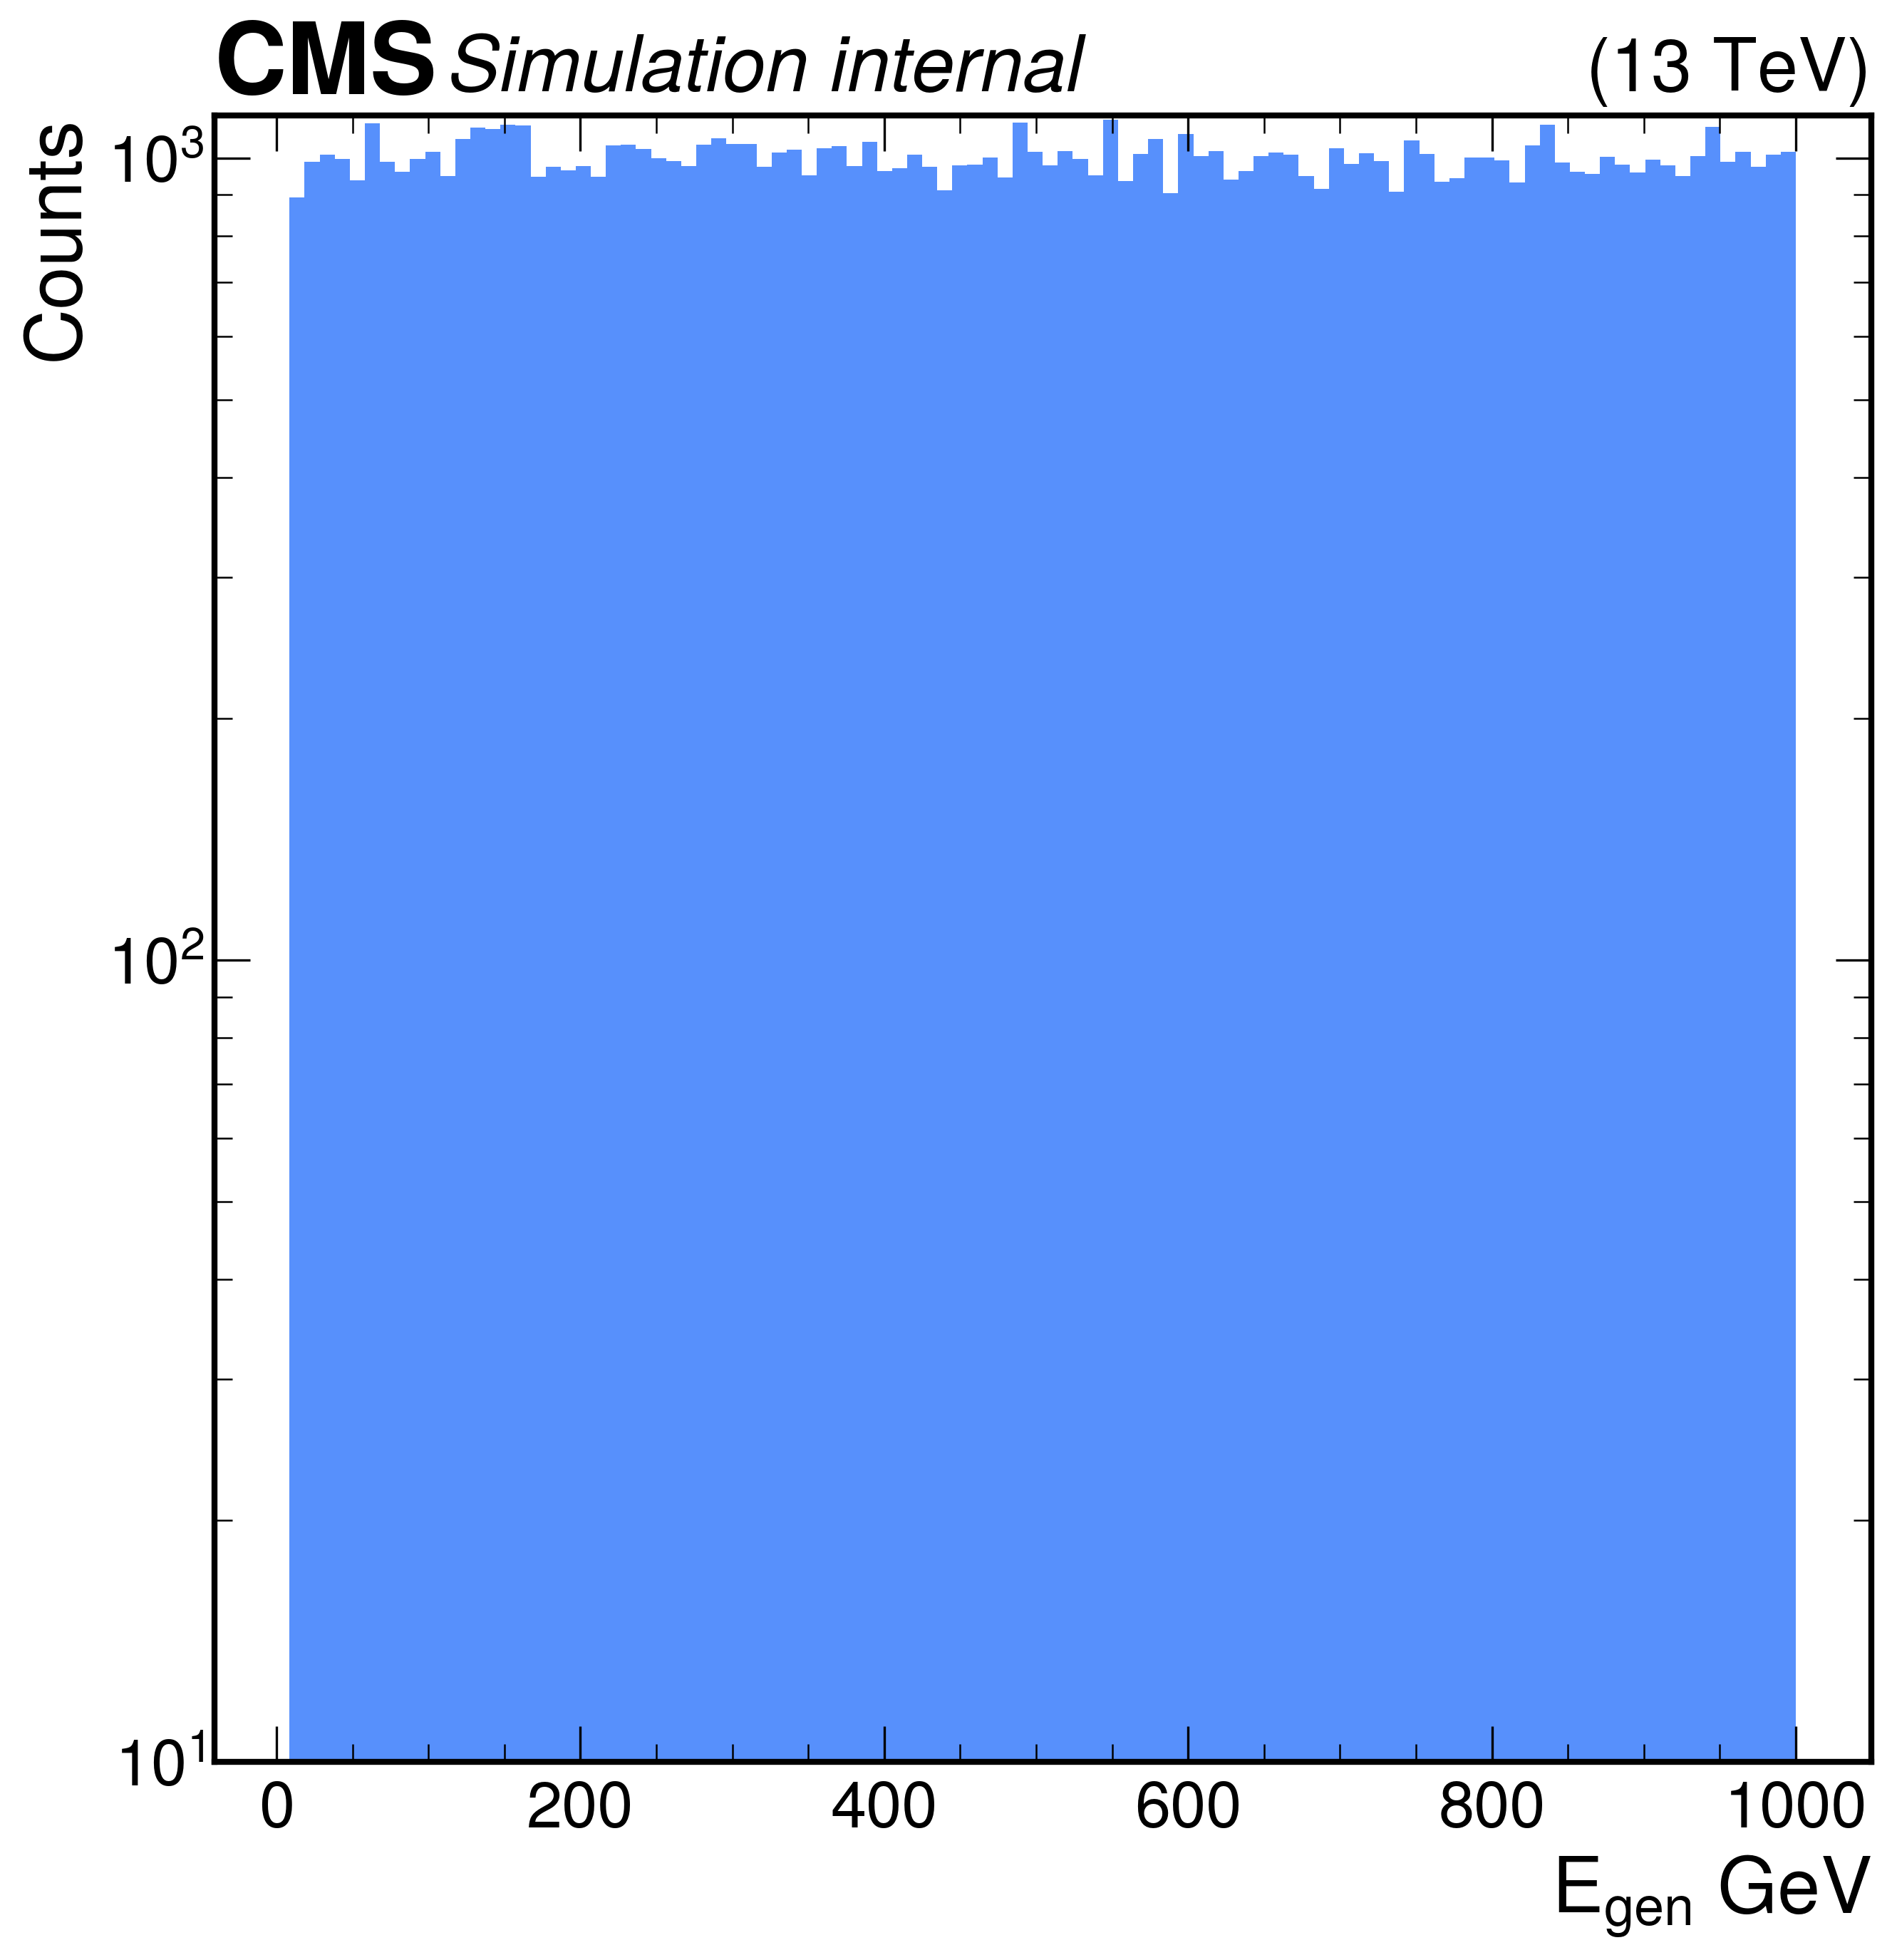

In [23]:
hep.style.use('CMS')

for key, data in e_data.items():
    fig, ax = plt.subplots()
    hep.cms.label('internal', loc=0, com=None)
    
    ax.hist(np.array(ak.flatten(data)), 100)
    ax.set_yscale('log')
    ax.set_ylabel('Counts')
    ax.set_ybound(10)
    ax.set_xlabel(f'$E_{{{key}}}$ GeV')
    plt.savefig(f'e_{key}')